# LOAD DATASETS

In [39]:
import os
test_rout=[]
test_label=[]
fish_type=[]
carpetas = [r"C:\Users\Tech4Diet\Desktop\GLORIA\IJCNN\Dataset_I_Seg\D_labrax\test\C", r"C:\Users\Tech4Diet\Desktop\GLORIA\IJCNN\Dataset_I_Seg\D_labrax\test\S", r"C:\Users\Tech4Diet\Desktop\GLORIA\IJCNN\Dataset_I_Seg\S_Aurata\test\C",r"C:\Users\Tech4Diet\Desktop\GLORIA\IJCNN\Dataset_I_Seg\S_Aurata\test\S"]
for carpeta in carpetas:
  if carpeta[-1]=='C':
    label=[0] * len(os.listdir(carpeta))
  elif carpeta[-1]=='S':
    label=[1] * len(os.listdir(carpeta))
  else:
    label=[2] * len(os.listdir(carpeta))
  test_label.extend(label)
  fish_type.extend(carpeta[-15]*len(os.listdir(carpeta)))
  for archivo in os.listdir(carpeta):
    if os.path.isfile(os.path.join(carpeta, archivo)):
      test_rout.append(carpeta+'/'+archivo)

len(test_rout)

870

In [40]:
import os
train_rout=[]
train_label=[]
fish_type_train=[]

carpetas = [r"C:\Users\Tech4Diet\Desktop\GLORIA\IJCNN\Dataset_I_Seg\D_labrax\train\C", r"C:\Users\Tech4Diet\Desktop\GLORIA\IJCNN\Dataset_I_Seg\D_labrax\train\S", r"C:\Users\Tech4Diet\Desktop\GLORIA\IJCNN\Dataset_I_Seg\S_Aurata\train\C",r"C:\Users\Tech4Diet\Desktop\GLORIA\IJCNN\Dataset_I_Seg\S_Aurata\train\S"]
for carpeta in carpetas:
  if carpeta[-1]=='C':
    label=[0] * len(os.listdir(carpeta))
  elif carpeta[-1]=='S':
    label=[1] * len(os.listdir(carpeta))
  else:
    label=[2] * len(os.listdir(carpeta))
  train_label.extend(label)
  fish_type_train.extend(carpeta[-16]*len(os.listdir(carpeta)))
  for archivo in os.listdir(carpeta):
    if os.path.isfile(os.path.join(carpeta, archivo)):
      train_rout.append(carpeta+'/'+archivo)

len(train_rout)


2978

In [41]:
import re
dict_users_train_S = {}
filtered_ES_rout_S = [r for r, f in zip(train_rout, fish_type_train) if f == 'S']
for idx, file_name in enumerate(filtered_ES_rout_S):
    nombre_archivo = os.path.basename(file_name)
    nombre_base = re.sub(r'\s?\(\d+\)', '', nombre_archivo).split('_')[0]

    if nombre_base not in dict_users_train_S:
        dict_users_train_S[nombre_base] = []
    dict_users_train_S[nombre_base].append(idx)

print(dict_users_train_S)

dict_users_train_D = {}
filtered_ES_rout_D = [r for r, f in zip(train_rout, fish_type_train) if f == 'D']
for idx, file_name in enumerate(filtered_ES_rout_D):
    nombre_archivo = os.path.basename(file_name)
    nombre_base = re.sub(r'\s?\(\d+\)', '', nombre_archivo).split('_')[0]

    if nombre_base not in dict_users_train_D:
        dict_users_train_D[nombre_base] = []
    dict_users_train_D[nombre_base].append(idx)

print(dict_users_train_D)

{'SA034': [0, 1, 2, 3], 'SA039': [4, 5, 6], 'SA040': [7, 8, 9, 10, 11], 'SA045': [12, 13, 14], 'SA046': [15, 16, 17, 18], 'SA047': [19, 20, 21], 'SA048': [22, 23, 24], 'SA049': [25, 26, 27], 'SA050': [28, 29, 30, 31, 32], 'SA059': [33, 34, 35], 'SA061': [36, 37, 38], 'SA062': [39, 40, 41], 'SA063': [42, 43, 44], 'SA064': [45, 46, 47], 'SA086': [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69], 'SA103': [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93], 'SA111': [94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124], 'SA139': [125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154], 'SA140': [155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

In [42]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
        print(f"Usando GPU: {physical_devices}")
    except Exception as e:
        print(f"Error configurando GPU: {e}")
else:
    print("No se detectó GPU, usando CPU.")

Usando GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [43]:
import os
import re

testES_rout=[]
testES_label=[]
fish_type_ES=[]

carpetas = [r"C:\Users\Tech4Diet\Desktop\GLORIA\IJCNN\Dataset_I_Seg\D_labrax\E",r"C:\Users\Tech4Diet\Desktop\GLORIA\IJCNN\Dataset_I_Seg\S_Aurata\E"]
for carpeta in carpetas:
  if carpeta[-1]=='C':
    label=[0] * len(os.listdir(carpeta))
  elif carpeta[-1]=='S':
    label=[1] * len(os.listdir(carpeta))
  else:
    label=[2] * len(os.listdir(carpeta))
  testES_label.extend(label)
  fish_type_ES.extend(carpeta[-10]*len(os.listdir(carpeta)))
  for archivo in os.listdir(carpeta):
    if os.path.isfile(os.path.join(carpeta, archivo)):
      testES_rout.append(carpeta+'/'+archivo)

dict_users_ES = {}

for idx, file_name in enumerate(testES_rout):
    nombre_archivo = os.path.basename(file_name)
    nombre_base = re.sub(r'\s?\(\d+\)', '', nombre_archivo).split('_')[0]

    if nombre_base not in dict_users_ES:
        dict_users_ES[nombre_base] = []
    dict_users_ES[nombre_base].append(idx)

print(dict_users_ES)

dict_users_ES_S = {}
filtered_ES_rout_S = [r for r, f in zip(testES_rout, fish_type_ES) if f == 'S']
for idx, file_name in enumerate(filtered_ES_rout_S):
    nombre_archivo = os.path.basename(file_name)
    nombre_base = re.sub(r'\s?\(\d+\)', '', nombre_archivo).split('_')[0]

    if nombre_base not in dict_users_ES_S:
        dict_users_ES_S[nombre_base] = []
    dict_users_ES_S[nombre_base].append(idx)

print(dict_users_ES_S)

dict_users_ES_D = {}
filtered_ES_rout_D = [r for r, f in zip(testES_rout, fish_type_ES) if f == 'D']
for idx, file_name in enumerate(filtered_ES_rout_D):
    nombre_archivo = os.path.basename(file_name)
    nombre_base = re.sub(r'\s?\(\d+\)', '', nombre_archivo).split('_')[0]

    if nombre_base not in dict_users_ES_D:
        dict_users_ES_D[nombre_base] = []
    dict_users_ES_D[nombre_base].append(idx)

print(dict_users_ES_D)

{'DL001': [0, 1, 2], 'DL002': [3, 4, 5, 6], 'DL003': [7, 8, 9, 10], 'DL005': [11, 12, 13, 14, 15, 16], 'DL006': [17, 18, 19, 20], 'DL007': [21, 22, 23, 24, 25], 'DL014': [26, 27, 28], 'DL015': [29, 30, 31, 32, 33, 34, 35], 'DL016': [36, 37, 38], 'DL017': [39, 40, 41, 42], 'DL018': [43, 44, 45, 46], 'DL019': [47, 48, 49], 'DL020': [50, 51, 52, 53, 54], 'DL021': [55, 56, 57], 'DL022': [58, 59, 60], 'DL023': [61, 62, 63], 'DL024': [64, 65, 66], 'DL025': [67, 68, 69], 'DL026': [70, 71, 72], 'DL027': [73, 74, 75, 76], 'DL028': [77, 78, 79], 'DL029': [80, 81, 82], 'DL030': [83, 84, 85], 'DL031': [86, 87, 88], 'DL032': [89, 90, 91], 'DL033': [92, 93, 94], 'DL034': [95, 96, 97], 'DL035': [98, 99, 100], 'DL036': [101, 102, 103], 'DL037': [104, 105, 106], 'DL038': [107, 108, 109], 'DL039': [110, 111, 112], 'DL041': [113, 114, 115], 'DL042': [116, 117, 118], 'DL043': [119, 120, 121], 'DL044': [122, 123, 124], 'DL045': [125, 126, 127], 'DL046': [128, 129], 'DL047': [130, 131, 132], 'DL048': [133, 

In [44]:
import re

dict_users = {}

for idx, file_name in enumerate(test_rout):
    nombre_archivo = os.path.basename(file_name)
    nombre_base = re.sub(r'\s?\(\d+\)', '', nombre_archivo).split('_')[0]

    if nombre_base not in dict_users:
        dict_users[nombre_base] = []
    dict_users[nombre_base].append(idx)

print(dict_users)

{'DL070': [0, 1, 2], 'DL075': [3, 4, 5, 6], 'DL107': [7, 8, 9], 'DL132': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37], 'DL152': [38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68], 'DL156': [69, 70, 71, 72, 73, 74], 'DL159': [75, 76, 77, 78, 79, 80], 'DL183': [81, 82, 83, 84, 85, 86], 'DL197': [87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101], 'DL211': [102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113], 'DL220': [114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131], 'DL226': [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149], 'DL231': [150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165], 'DL235': [166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178], 'DL237': [179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 

In [45]:
import re

dict_users_S = {}
filtered_test_rout_S = [r for r, f in zip(test_rout, fish_type) if f == 'S']
for idx, file_name in enumerate(filtered_test_rout_S):
    nombre_archivo = os.path.basename(file_name)
    nombre_base = re.sub(r'\s?\(\d+\)', '', nombre_archivo).split('_')[0]

    if nombre_base not in dict_users_S:
        dict_users_S[nombre_base] = []
    dict_users_S[nombre_base].append(idx)

print(dict_users_S)

dict_users_D = {}
filtered_test_rout_D = [r for r, f in zip(test_rout, fish_type) if f == 'D']
for idx, file_name in enumerate(filtered_test_rout_D):
    nombre_archivo = os.path.basename(file_name)
    nombre_base = re.sub(r'\s?\(\d+\)', '', nombre_archivo).split('_')[0]

    if nombre_base not in dict_users_D:
        dict_users_D[nombre_base] = []
    dict_users_D[nombre_base].append(idx)

print(dict_users_D)

{'SA035': [0, 1, 2, 3, 4], 'SA038': [5, 6, 7, 8, 9, 10], 'SA058': [11, 12, 13], 'SA060': [14], 'SA137': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], 'SA146': [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74], 'SA151': [75, 76, 77], 'SA154': [78, 79, 80, 81, 82, 83], 'SA155': [84, 85, 86, 87, 88, 89], 'SA158': [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107], 'SA161': [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125], 'SA187': [126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143], 'SA055': [144, 145, 146, 147], 'SA069': [148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160], 'SA074': [161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176], 'SA075': [177, 178, 179, 180, 181, 182, 183, 184, 185, 186,

# CLIP LUBINA (D_LABRAX)

In [46]:
import os
import clip
import torch
from PIL import Image

results=[]

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

test_label_D=[]
imagens_tensor_D = []
for r, fish, l in zip(test_rout, fish_type, test_label):
  if fish == "D":
    image = Image.open(r)
    image_input = preprocess(image).unsqueeze(0).to(device)
    imagens_tensor_D.append(image_input)
    test_label_D.append(l)

# 84%
'''
classes = [
    "a close-up of a fish with a uniform gray color that transitions to a white ventral side and an oval body and in which the mouth slightly tilted upwards,",  # Captivity
    "a close-up of a fish with a straight body, a color that transitions from a darker upper side, to a white ventral side and in which the mouth follows the same direction as the main axis of the body", # Wild
]
classes = [
    "a close-up of a fish with a uniform gray color that transitions to a white ventral side and an oval body and in which the mouth slightly tilted upwards, the lateral fins are close to the body and small,",  # Captivity
    "a close-up of a fish with a straight body, a color that transitions from a darker upper side to a white ventral side and in which the mouth follows the same direction as the main axis of the body", # Wild
]
classes = [
    "a close-up of a fish with a uniform gray color that transitions to a white ventral side and an oval body and in which the mouth slightly tilted upwards, the lateral fins are close to the body and small,",  # Captivity
    "a close-up of a fish with a straight body, a color that transitions from a darker upper side to a white ventral side and in which the mouth follows the same direction as the main axis of the body, the dorsal fin is symmetrical", # Wild
]
'''
# 85%
'''
classes = [
    "a close-up of a fish with a uniform gray color that transitions to a white ventral side and an oval body and in which the mouth slightly tilted upwards, the lateral fins are close to the body and small,",  # Captivity
    "a close-up of a fish with a straight body, the color transitions from a darker upper side to a white ventral side and in which the mouth follows direction of the main axis of the body, the dorsal fin is symmetrical", # Wild
]
'''

classes = [
    "a close-up of a fish with a uniform gray color that transitions to a white ventral side, an oval body and the mouth is slightly tilted upwards, the lateral fins are close to the body and small,",  # Captivity
    "a close-up of a fish with a straight body, the color transitions from a darker upper side to a white ventral side and in which the mouth follows direction of the main axis of the body, the dorsal fin is symmetrical", # Wild
]
classes = [
    "a close-up of a fish with a uniform gray color that transitions to a white ventral side, an oval body and the mouth is slightly tilted upwards, the lateral fins are close to the body and small,",  # Captivity
    "a close-up of a fish with a straight body, the color transitions from a darker upper side to a white ventral side and in which the mouth follows direction of the main axis of the body, the dorsal fin is symmetrical", # Wild
]
labels = ["Farm fish", "Wild fish"]


text_inputs = torch.cat([clip.tokenize(c) for c in classes]).to(device)

# Calculate features
with torch.no_grad():
  text_features = model.encode_text(text_inputs)

batch_images = torch.cat(imagens_tensor_D, dim=0)

with torch.no_grad():
  image_features_D = model.encode_image(batch_images)

text_features /= text_features.norm(dim=-1, keepdim=True)
for imgF in image_features_D:
  imgF_norm = imgF / imgF.norm(dim=-1, keepdim=True)
  similarity = (100.0 * imgF_norm @ text_features.T).softmax(dim=-1)
  values, indices = similarity.topk(2)
  results.append([indices.tolist()[0],values.tolist()[0]])


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       211
           1       0.63      0.80      0.71        76

    accuracy                           0.82       287
   macro avg       0.77      0.82      0.79       287
weighted avg       0.84      0.82      0.83       287



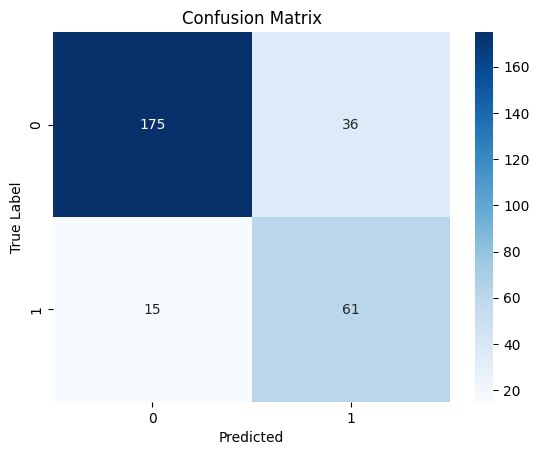


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.71      0.71      0.71         7

    accuracy                           0.83        23
   macro avg       0.79      0.79      0.79        23
weighted avg       0.83      0.83      0.83        23



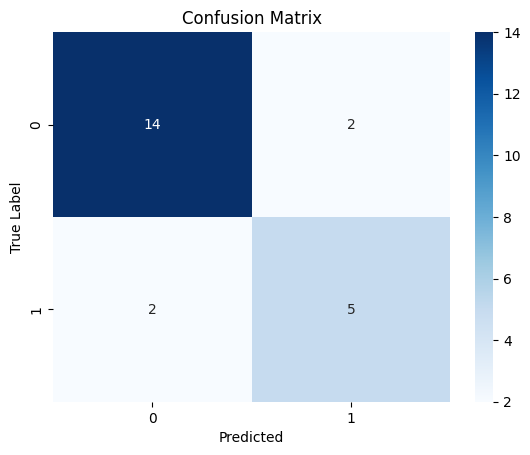

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred= [fila[0] for fila in results]
print("\nReporte de clasificación:\n", classification_report(test_label_D, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_label_D, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

users_test_label_D=[]
users_y_pred_D=[]
user_y_prob_D=[]

for _, indices in dict_users_D.items():
  users_test_label_D.append(round(sum([test_label_D[i] for i in indices])/len(indices)))
  prob=[]
  for z in [results[i] for i in indices]:
    if z[0]==1:
      prob.append(z[1])
    else:
      prob.append(1-z[1])
  users_y_pred_D.append(round(sum(prob)/len(indices)))
  user_y_prob_D.append((sum(prob)/len(indices)))

from sklearn.metrics import classification_report, confusion_matrix
print("\nReporte de clasificación:\n", classification_report(users_test_label_D, users_y_pred_D))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(users_test_label_D, users_y_pred_D)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# CLIP DORADA (S_AURATA)

In [48]:
# LUBINA

import os
import clip
import torch
from PIL import Image

results=[]

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

test_label_S=[]
imagens_tensor_S = []
for r, fish, l in zip(test_rout, fish_type, test_label):
  if fish == "S":
    image = Image.open(r)
    image_input = preprocess(image).unsqueeze(0).to(device)
    imagens_tensor_S.append(image_input)
    test_label_S.append(l)

# 80%
'''
classes = [
    "a close-up of a dark grey fish with a curved bottom, the lateral fins are close to the body and small",  # Captivity
    "a close-up of a fish with a flat bottom and in mouth follows the direction of the main axis of the body, the dorsal fin is symmetrical", # Wild
]
'''
'''
# 84 %
classes = [
    "a close-up of a dark grey fish with a curved bottom, the lateral fins are close to the body and small",  # Captivity
    "a close-up of a fish with a flat bottom and in mouth follows the direction of the main axis of the body,the lateral fins separated from the body and oriented slightly backward and the dorsal fin is symmetrical", # Wild
]
'''
classes = [
    "a close-up of a dark grey fish with an oval body, a white ventral side with high contrast with the body, the mouth is slightly tilted upwards, the lateral fins are close to the body and small",  # Captivity
    "a close-up of a fish with a straight body, a white ventral side with high contrast with the body, the mouth follows the direction of the main axis of the body, the dorsal fin is symmetrical", # Wild
]
classes = [
    "a close-up of a dark grey fish with a curved bottom, the lateral fins are close to the body and small",  # Captivity
    "a close-up of a fish with a flat bottom and in mouth follows the direction of the main axis of the body, the lateral fins separated from the body and oriented slightly backward and the dorsal fin is symmetrical", # Wild
]
labels=["Farmed fish","Wild fish"]

text_inputs = torch.cat([clip.tokenize(c) for c in classes]).to(device)

# Calculate features
with torch.no_grad():
  text_features = model.encode_text(text_inputs)

batch_images = torch.cat(imagens_tensor_S, dim=0)

with torch.no_grad():
  image_features_S = model.encode_image(batch_images)

text_features /= text_features.norm(dim=-1, keepdim=True)
for imgF in image_features_S:
  imgF_norm = imgF / imgF.norm(dim=-1, keepdim=True)
  similarity = (100.0 * imgF_norm @ text_features.T).softmax(dim=-1)
  values, indices = similarity.topk(2)
  results.append([indices.tolist()[0],values.tolist()[0]])


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60       144
           1       0.87      0.87      0.87       439

    accuracy                           0.80       583
   macro avg       0.73      0.74      0.74       583
weighted avg       0.80      0.80      0.80       583



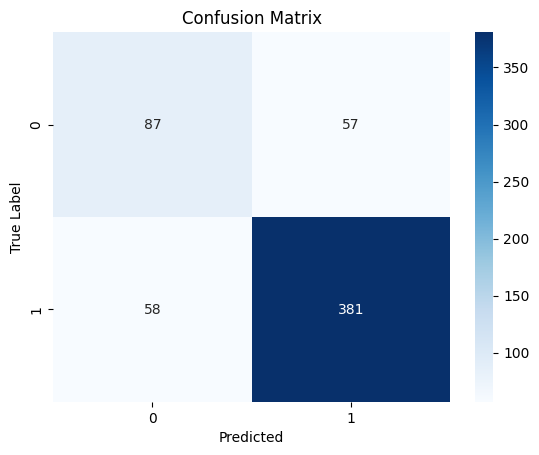


Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.79      1.00      0.88        19

    accuracy                           0.84        31
   macro avg       0.90      0.79      0.81        31
weighted avg       0.87      0.84      0.83        31



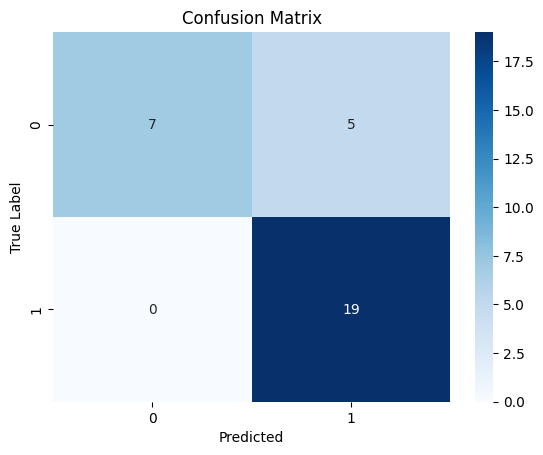

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred= [fila[0] for fila in results]
print("\nReporte de clasificación:\n", classification_report(test_label_S, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_label_S, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

users_test_label_S=[]
users_y_pred_S=[]
user_y_prob_S=[]

for _, indices in dict_users_S.items():
  users_test_label_S.append(round(sum([test_label_S[i] for i in indices])/len(indices)))
  prob=[]
  for z in [results[i] for i in indices]:
    if z[0]==1:
      prob.append(z[1])
    else:
      prob.append(1-z[1])
  users_y_pred_S.append(round(sum(prob)/len(indices)))
  user_y_prob_S.append((sum(prob)/len(indices)))

from sklearn.metrics import classification_report, confusion_matrix
print("\nReporte de clasificación:\n", classification_report(users_test_label_S, users_y_pred_S))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(users_test_label_S, users_y_pred_S)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Para cada especie

In [50]:
import os
import clip
import torch
import numpy as np
from PIL import Image

labels=["Fish in captivity","Wild fish"]

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

imagens_tensor_SC = []
imagens_tensor_DC = []

train_rout_C = [rout for rout, l in zip(train_rout, train_label) if l == 0]
fish_type_train_C = [fish for fish, l in zip(fish_type_train, train_label) if l == 0]

for r, fish_t in zip(train_rout_C, fish_type_train_C):
  image = Image.open(r)
  image_input = preprocess(image).unsqueeze(0).to(device)
  if fish_t == 'S':
    imagens_tensor_SC.append(image_input)
  elif fish_t == 'D':
    imagens_tensor_DC.append(image_input)

batch_images_SC = torch.cat(imagens_tensor_SC, dim=0)
batch_images_DC = torch.cat(imagens_tensor_DC, dim=0)

with torch.no_grad():
  image_features_SC = model.encode_image(batch_images_SC)
  image_features_DC = model.encode_image(batch_images_DC)

imagens_tensor_SS = []
imagens_tensor_DS = []

train_rout_S = [rout for rout, l in zip(train_rout, train_label) if l == 1]
fish_type_train_S = [fish for fish, l in zip(fish_type_train, train_label) if l == 1]

for r, fish_t in zip(train_rout_S, fish_type_train_S):
  image = Image.open(r)
  image_input = preprocess(image).unsqueeze(0).to(device)
  if fish_t == 'S':
    imagens_tensor_SS.append(image_input)
  elif fish_t == 'D':
    imagens_tensor_DS.append(image_input)

batch_images_SS = torch.cat(imagens_tensor_SS, dim=0)
batch_images_DS = torch.cat(imagens_tensor_DS, dim=0)

with torch.no_grad():
  image_features_SS = model.encode_image(batch_images_SS)
  image_features_DS = model.encode_image(batch_images_DS)

In [51]:
imagens_tensor_ES=[]
imagens_tensor_ED=[]

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

for fish_t, r in zip(fish_type_ES,testES_rout):
  image = Image.open(r)
  image_input = preprocess(image).unsqueeze(0).to(device)
  if fish_t == 'S':
    imagens_tensor_ES.append(image_input)
  elif fish_t == 'D':
    imagens_tensor_ED.append(image_input)
batch_images_ED = torch.cat(imagens_tensor_ED, dim=0)
batch_images_ES = torch.cat(imagens_tensor_ES, dim=0)
with torch.no_grad():
  image_features_ES = model.encode_image(batch_images_ES)
  image_features_ED = model.encode_image(batch_images_ED)

text_labels_S = [
    "a close-up of a dark grey fish with a curved bottom, the lateral fins are close to the body and small",  # Captivity
    "a close-up of a fish with a flat bottom and in mouth follows the direction of the main axis of the body, the lateral fins separated from the body and oriented slightly backward and the dorsal fin is symmetrical", # Wild
]
text_inputs = torch.cat([clip.tokenize(label) for label in text_labels_S]).to(device)

with torch.no_grad():
    text_features_S = model.encode_text(text_inputs)

text_features_S_norm = text_features_S / text_features_S.norm(dim=-1, keepdim=True)

text_labels_D = [
    "a close-up of a fish with a uniform gray color that transitions to a white ventral side, an oval body and the mouth is slightly tilted upwards, the lateral fins are close to the body and small,",  # Captivity
    "a close-up of a fish with a straight body, the color transitions from a darker upper side to a white ventral side and in which the mouth follows direction of the main axis of the body, the dorsal fin is symmetrical", # Wild
]
text_inputs = torch.cat([clip.tokenize(label) for label in text_labels_D]).to(device)

with torch.no_grad():
    text_features_D = model.encode_text(text_inputs)

text_features_D_norm = text_features_D / text_features_D.norm(dim=-1, keepdim=True)

all_features_S=[]
for imgF in image_features_ES:
    imgF2 = imgF / imgF.norm(dim=-1, keepdim=True)
    similarity = 100.0 * imgF2 @ text_features_S_norm.T  
    values, indices = similarity.topk(2)
    all_features_S.append([imgF,text_features_S[indices[0]]])

all_features_D=[]
for imgF in image_features_ED:
    imgF2 = imgF / imgF.norm(dim=-1, keepdim=True)
    similarity = 100.0 * imgF2 @ text_features_D_norm.T  
    values, indices = similarity.topk(2)
    all_features_D.append([imgF,text_features_D[indices[0]]])

XEscap_S = [np.concatenate((emb.numpy(), text.numpy())) for emb, text in all_features_S]
XEscap_D = [np.concatenate((emb.numpy(), text.numpy())) for emb, text in all_features_D]

In [52]:
comb_image_features_SC = torch.mean(image_features_SC, dim=0)
comb_image_features_DC = torch.mean(image_features_DC, dim=0)
comb_image_features_SS = torch.mean(image_features_SS, dim=0)
comb_image_features_DS = torch.mean(image_features_DS, dim=0)

comb_image_features_SC /= comb_image_features_SC.norm(dim=-1, keepdim=True)
comb_image_features_DC /= comb_image_features_DC.norm(dim=-1, keepdim=True)
comb_image_features_SS /= comb_image_features_SS.norm(dim=-1, keepdim=True)
comb_image_features_DS /= comb_image_features_DS.norm(dim=-1, keepdim=True)

In [53]:
alpha=0.5

results_S=[]
results_D=[]

test_imagens_tensor_S = []
test_imagens_tensor_D = []
test_label_S=[]
test_label_D=[]

text_labels_S = [
    # Cultivada
    "a close-up of a uniformly grey fish with reddish spots near its gills",
    "a close-up of a fish with a white ventral side that strongly contrasts with its grey body",
    "a close-up of a fish with an oval-shaped body and short pectoral fins that do not exceed the lateral line",
    "a close-up of a fish with fins that appear damaged or shortened and a faint or incomplete lateral line",
    "a close-up of a fish with a slightly upward-oriented mouth and a middle-positioned head",
    "a close-up of a fish with a grey body, white underside, and lateral fins that are damaged or appear eroded",

    # Salvaje
    "a close-up of a fish with a bright grey body and golden-yellow hue",
    "a close-up of a fish with color that gradually transitions to white on the ventral side",
    "a close-up of a fish with a straight body and a head featuring an angular contour",
    "a close-up of a fish with long pectoral fins that exceed the lateral line",
    "a close-up of a fish with a complete and clearly defined lateral line",
    "a close-up of a fish with a straight mouth positioned lower on its head"   
]
text_inputs = torch.cat([clip.tokenize(label) for label in text_labels_S]).to(device)

with torch.no_grad():
    text_features_S = model.encode_text(text_inputs)

text_features_S_norm = text_features_S / text_features_S.norm(dim=-1, keepdim=True)

text_labels_D = [
    # Cultivada
    "a close-up of a dark grey fish that gradually lightens to a mostly white ventral side",
    "a close-up of a fish with a curved bottom",
    "a close-up of a fish with a gently sloping upper head contour ending at the mouth",
    "a close-up of a fish with a faint or incomplete lateral line",
    "a close-up of a fish in which the mouth is slightly tilted upwards",
    "a close-up of a fish with smaller fins close to the body",

    # Salvaje
    "a close-up of a fish with a grey body featuring greenish and golden-yellow hues that softly transition to white on the ventral side",
    "a close-up of a fish with a flat bottom",
    "a close-up of a fish with a sharply sloping upper head contour ending at the mouth",
    "a close-up of a fish with a complete and well-defined lateral line",
    "a close-up of a fish in which the mouth follows direction of the main axis of the body",
    "a close-up of a fish in which the lateral fins are separated from the body and oriented slightly backward and the dorsal fin is symmetrical"
]
text_inputs = torch.cat([clip.tokenize(label) for label in text_labels_D]).to(device)

with torch.no_grad():
    text_features_D = model.encode_text(text_inputs)

text_features_D_norm = text_features_D / text_features_D.norm(dim=-1, keepdim=True)


for r, fish_t, lab_t in zip(test_rout, fish_type, test_label):
  image = Image.open(r)
  image_input = preprocess(image).unsqueeze(0).to(device)
  if fish_t == 'S':
    test_imagens_tensor_S.append(image_input)
    test_label_S.append(lab_t)
  elif fish_t == 'D':
    test_imagens_tensor_D.append(image_input)
    test_label_D.append(lab_t)

test_batch_images_S = torch.cat(test_imagens_tensor_S, dim=0)
test_batch_images_D = torch.cat(test_imagens_tensor_D, dim=0)

with torch.no_grad():
  test_image_features_S = model.encode_image(test_batch_images_S)
  test_image_features_D = model.encode_image(test_batch_images_D)

for imgF in test_image_features_S:
    imgF2 = imgF / imgF.norm(dim=-1, keepdim=True)

    # Similaridad con imágenes y texto
    similarity_C_image = 100.0 * imgF2 @ comb_image_features_SC.T
    similarity_S_image = 100.0 * imgF2 @ comb_image_features_SS.T

    similarity_C_text = (100.0 * imgF2 @ text_features_S_norm[:6].T).mean(dim=-1)
    similarity_S_text = (100.0 * imgF2 @ text_features_S_norm[6:].T).mean(dim=-1)  

    similarity_C_combined = alpha * similarity_C_image + (1 - alpha) * similarity_C_text
    similarity_S_combined = alpha * similarity_S_image + (1 - alpha) * similarity_S_text

    # Combinar las similitudes (imágenes y texto)
    similarity_combined = torch.cat(
        (
            similarity_C_combined.unsqueeze(0),
            similarity_S_combined.unsqueeze(0)
        ), 
        dim=-1
    )

    # Aplicar softmax para obtener probabilidades
    similarity = similarity_combined.softmax(dim=-1)
    values, indices = similarity.topk(2)
    results_S.append([indices.tolist()[0], values.tolist()[0]])

for imgF in test_image_features_D:
    imgF2 = imgF / imgF.norm(dim=-1, keepdim=True)

    # Similaridad con imágenes y texto
    similarity_C_image = 100.0 * imgF2 @ comb_image_features_DC.T
    similarity_S_image = 100.0 * imgF2 @ comb_image_features_DS.T

    similarity_C_text = (100.0 * imgF2 @ text_features_D_norm[:6].T).mean(dim=-1)
    similarity_S_text = (100.0 * imgF2 @ text_features_D_norm[6:].T).mean(dim=-1)  

    similarity_C_combined = alpha * similarity_C_image + (1 - alpha) * similarity_C_text
    similarity_S_combined = alpha * similarity_S_image + (1 - alpha) * similarity_S_text

    # Combinar las similitudes (imágenes y texto)
    similarity_combined = torch.cat(
        (
            similarity_C_combined.unsqueeze(0),
            similarity_S_combined.unsqueeze(0)
        ), 
        dim=-1
    )


    # Aplicar softmax para obtener probabilidades
    similarity = similarity_combined.softmax(dim=-1)
    values, indices = similarity.topk(2)
    results_D.append([indices.tolist()[0], values.tolist()[0]])

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_S= [fila[0] for fila in results_S]
test_label_S = [int(label) for label in test_label_S]
assert len(y_pred_S) == len(test_label_S)
print("\nReporte de clasificación en S_Aurata:\n", classification_report(test_label_S, y_pred_S))


Reporte de clasificación en S_Aurata:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76       144
           1       0.94      0.90      0.92       439

    accuracy                           0.87       583
   macro avg       0.83      0.85      0.84       583
weighted avg       0.88      0.87      0.88       583



In [55]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_D= [fila[0] for fila in results_D]
print("\nReporte de clasificación en D_labrax:\n", classification_report(test_label_D, y_pred_D))


Reporte de clasificación en D_labrax:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       211
           1       0.75      0.54      0.63        76

    accuracy                           0.83       287
   macro avg       0.80      0.74      0.76       287
weighted avg       0.82      0.83      0.82       287



In [56]:
users_test_label_S=[]
users_y_pred_S=[]
user_y_prob_S=[]

for _, indices in dict_users_S.items():
  users_test_label_S.append(sum([test_label_S[i] for i in indices])/len(indices))

  prob=[]
  for z in [results_S[i] for i in indices]:
    if z[0]==1:
      prob.append(z[1])
    else:
      prob.append(1-z[1])
  users_y_pred_S.append(round(sum(prob)/len(indices)))
  user_y_prob_S.append((sum(prob)/len(indices)))

users_test_label_D=[]
users_y_pred_D=[]
user_y_prob_D=[]

for _, indices in dict_users_D.items():
  users_test_label_D.append(sum([test_label_D[i] for i in indices])/len(indices))

  prob=[]
  for z in [results_D[i] for i in indices]:
    if z[0]==1:
      prob.append(z[1])
    else:
      prob.append(1-z[1])
  users_y_pred_D.append(round(sum(prob)/len(indices)))
  user_y_prob_D.append((sum(prob)/len(indices)))


In [57]:
from sklearn.metrics import classification_report, confusion_matrix
print("\nReporte de clasificación:\n", classification_report(users_test_label_S, users_y_pred_S))


Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       1.00      0.75      0.86        12
         1.0       0.86      1.00      0.93        19

    accuracy                           0.90        31
   macro avg       0.93      0.88      0.89        31
weighted avg       0.92      0.90      0.90        31



In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print("\nReporte de clasificación:\n", classification_report(users_test_label_D, users_y_pred_D))


Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.93      0.88      0.90        16
         1.0       0.75      0.86      0.80         7

    accuracy                           0.87        23
   macro avg       0.84      0.87      0.85        23
weighted avg       0.88      0.87      0.87        23



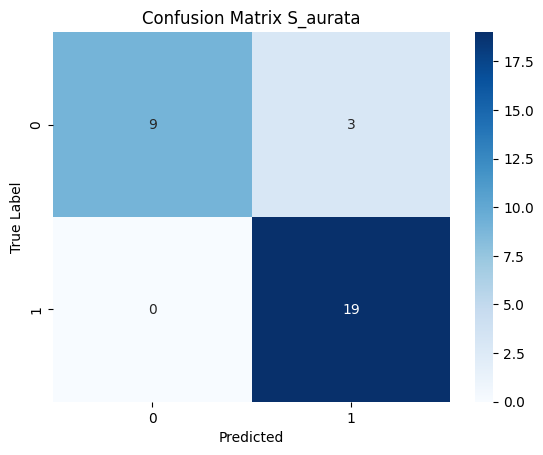

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(users_test_label_S, users_y_pred_S)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix S_aurata')
plt.show()

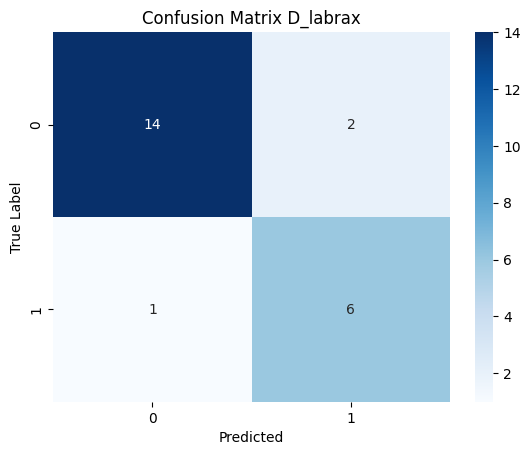

In [60]:
cm = confusion_matrix(users_test_label_D, users_y_pred_D)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix D_labrax')
plt.show()

# T-SNE AURATA

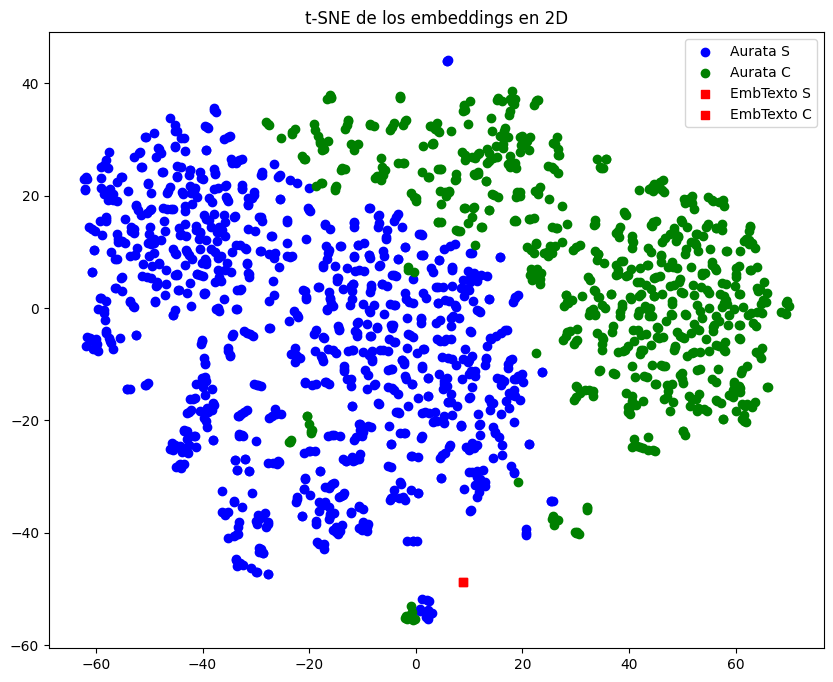

In [61]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import clip
import torch

embeddings_S = np.concatenate((image_features_SS, image_features_SC), axis=0)
text_features_S_extended = np.vstack((text_features_S[0].unsqueeze(0).numpy(),
                                      text_features_S[1].unsqueeze(0).numpy()))
embeddings_S_Text = np.concatenate((embeddings_S, text_features_S_extended), axis=0)
embeddings_S_test = test_image_features_S

labels_S = np.concatenate((np.zeros(len(image_features_SS)),  # Aurata S (imágenes)
                         np.ones(len(image_features_SC)),   # Aurata C (imágenes)
                         [2, 3]))  # Embeddings de texto: "Aurata S" y "Aurata C"
labels_test = test_label_S


tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_S_tsne = tsne.fit_transform(embeddings_S_Text)

plt.figure(figsize=(10, 8))

# Clase 0: Aurata S
plt.scatter(embeddings_S_tsne[(labels_S == 0), 0], embeddings_S_tsne[(labels_S == 0), 1],
            c='blue', marker='o', label='Aurata S')

# Clase 1: Aurata C
plt.scatter(embeddings_S_tsne[(labels_S == 1), 0], embeddings_S_tsne[(labels_S == 1), 1],
            c='green', marker='o', label='Aurata C')

# Clase 0: Aurata S
plt.scatter(embeddings_S_tsne[(labels_S == 2), 0], embeddings_S_tsne[(labels_S == 2), 1],
            c='red', marker='s', label='EmbTexto S')

# Clase 1: Aurata C
plt.scatter(embeddings_S_tsne[(labels_S == 3), 0], embeddings_S_tsne[(labels_S == 3), 1],
            c='red', marker='s', label='EmbTexto C')

plt.title("t-SNE de los embeddings en 2D")
plt.legend()
plt.show()

c:\Users\Tech4Diet\anaconda3\envs\clip_tf_env\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


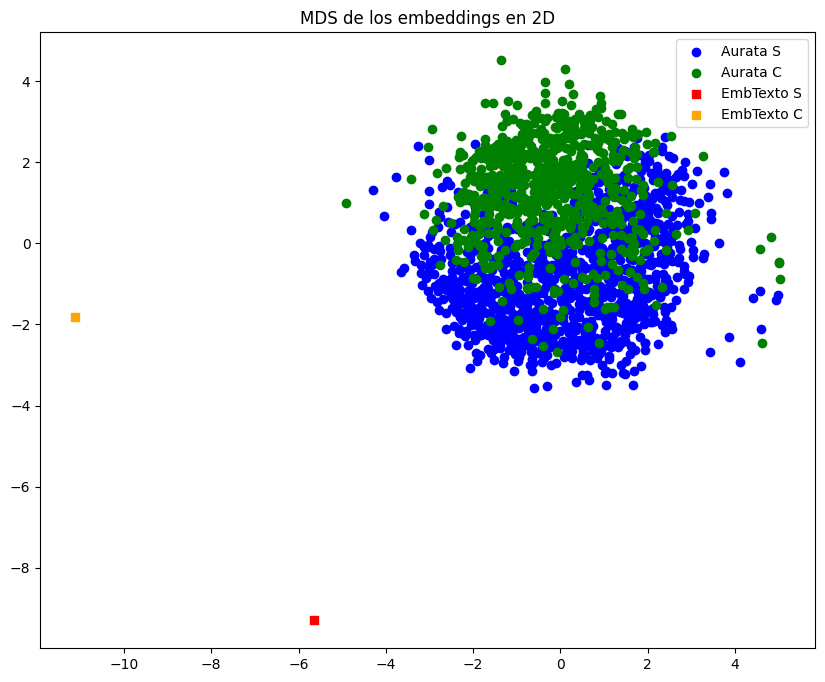

In [62]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

embeddings_S = np.concatenate((image_features_SS, image_features_SC), axis=0)
text_features_S_extended = np.vstack((text_features_S[0].unsqueeze(0).numpy(),
                                      text_features_S[1].unsqueeze(0).numpy()))
embeddings_S_Text = np.concatenate((embeddings_S, text_features_S_extended), axis=0)

labels_S = np.concatenate((
    np.zeros(len(image_features_SS)),  # Clase 0: Aurata S
    np.ones(len(image_features_SC)),   # Clase 1: Aurata C
    [2, 3]  # Clase 2: Embedding Texto S, Clase 3: Embedding Texto C
))

# Aplicar MDS
mds = MDS(n_components=2, random_state=42)
embeddings_S_mds = mds.fit_transform(embeddings_S_Text)

# Graficar MDS
plt.figure(figsize=(10, 8))

# Clase 0: Aurata S
plt.scatter(embeddings_S_mds[(labels_S == 0), 0], embeddings_S_mds[(labels_S == 0), 1],
            c='blue', marker='o', label='Aurata S')

# Clase 1: Aurata C
plt.scatter(embeddings_S_mds[(labels_S == 1), 0], embeddings_S_mds[(labels_S == 1), 1],
            c='green', marker='o', label='Aurata C')

# Clase 2: Embedding Texto S
plt.scatter(embeddings_S_mds[(labels_S == 2), 0], embeddings_S_mds[(labels_S == 2), 1],
            c='red', marker='s', label='EmbTexto S')

# Clase 3: Embedding Texto C
plt.scatter(embeddings_S_mds[(labels_S == 3), 0], embeddings_S_mds[(labels_S == 3), 1],
            c='orange', marker='s', label='EmbTexto C')

plt.title("MDS de los embeddings en 2D")
plt.legend()
plt.show()


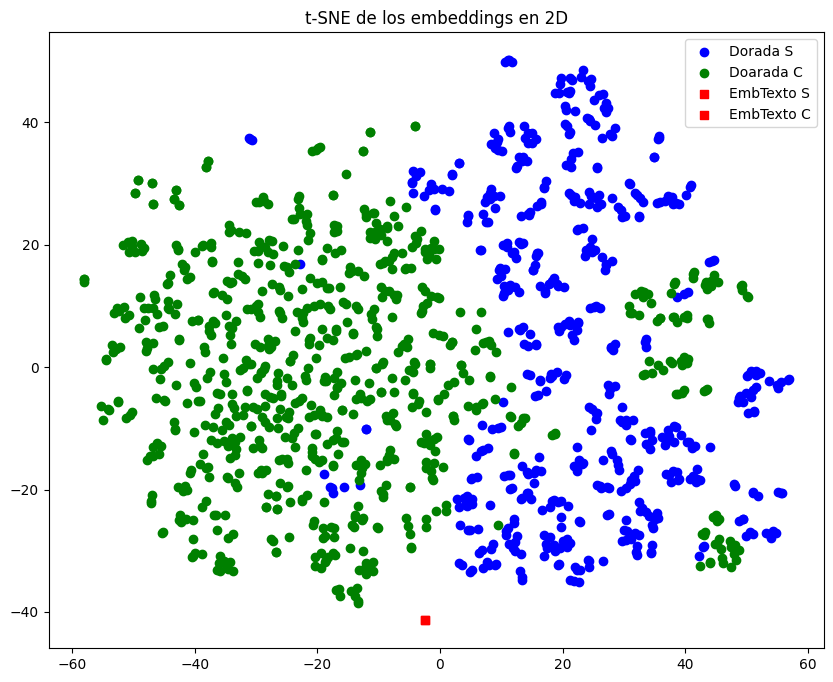

In [63]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import clip
import torch

#text_features_D /= np.linalg.norm(text_features_D, axis=1, keepdims=True)

embeddings_D = np.concatenate((image_features_DS, image_features_DC), axis=0)
text_features_D_extended = np.vstack((text_features_D[0].unsqueeze(0).numpy(),
                                      text_features_D[1].unsqueeze(0).numpy()))
embeddings_D_Text = np.concatenate((embeddings_D, text_features_D_extended), axis=0)
embeddings_D_test = test_image_features_D

labels_D = np.concatenate((np.zeros(len(image_features_DS)),  # Aurata S (imágenes)
                         np.ones(len(image_features_DC)),   # Aurata C (imágenes)
                         [2, 3]))  # Embeddings de texto: "Aurata S" y "Aurata C"
labels_test = test_label_D


tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_D_tsne = tsne.fit_transform(embeddings_D_Text)

plt.figure(figsize=(10, 8))

# Clase 0: Aurata S
plt.scatter(embeddings_D_tsne[(labels_D == 0), 0], embeddings_D_tsne[(labels_D == 0), 1],
            c='blue', marker='o', label='Dorada S')

# Clase 1: Aurata C
plt.scatter(embeddings_D_tsne[(labels_D == 1), 0], embeddings_D_tsne[(labels_D == 1), 1],
            c='green', marker='o', label='Doarada C')

# Clase 0: Aurata S
plt.scatter(embeddings_D_tsne[(labels_D == 2), 0], embeddings_D_tsne[(labels_D == 2), 1],
            c='red', marker='s', label='EmbTexto S')

# Clase 1: Aurata C
plt.scatter(embeddings_D_tsne[(labels_D == 3), 0], embeddings_D_tsne[(labels_D == 3), 1],
            c='red', marker='s', label='EmbTexto C')

plt.title("t-SNE de los embeddings en 2D")
plt.legend()
plt.show()

In [64]:
embedings_DText=[]
embeddings_DText_test=[]

embeddings_D_tensor = torch.tensor(embeddings_D)

text_norm_D = text_features_D_norm

for emb in embeddings_D_tensor:
  emb_norm = emb / emb.norm(dim=-1, keepdim=True)
  similarity = (100.0 * emb_norm @ text_norm_D.T).softmax(dim=-1)
  _, indices = similarity.topk(2)
  most_similar_text_embedding = text_features_D[indices[0]]
  embedings_DText.append((emb, most_similar_text_embedding))

for emb in embeddings_D_test:
  emb_norm = emb / emb.norm(dim=-1, keepdim=True)
  similarity = (100.0 * emb_norm @ text_norm_D.T).softmax(dim=-1)
  _, indices = similarity.topk(2)
  most_similar_text_embedding = text_features_D[indices[0]]
  embeddings_DText_test.append((emb, most_similar_text_embedding))

embedings_SText = []
embeddings_SText_test = []

# Assuming `embeddings_S` and `embeddings_S_test` are defined tensors
embeddings_S_tensor = torch.tensor(embeddings_S)
embeddings_S_test_tensor = torch.tensor(embeddings_S_test)

# Normalized text features
text_norm_S = text_features_S_norm

# Processing embeddings for training
for emb in embeddings_S_tensor:
    emb_norm = emb / emb.norm(dim=-1, keepdim=True)
    similarity = (100.0 * emb_norm @ text_norm_S.T).softmax(dim=-1)
    similarity_class_0 = similarity[0].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_1 = similarity[1].mean()  # Average similarity for class 1 (Salvaje)
    similarity_class_2 = similarity[2].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_3 = similarity[3].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_4 = similarity[4].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_5 = similarity[5].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_6 = similarity[6].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_7 = similarity[7].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_8 = similarity[8].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_9 = similarity[9].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_10 = similarity[10].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_11 = similarity[11].mean()  # Average similarity for class 0 (Cultivada)
    class_similarities = torch.tensor([similarity_class_0, similarity_class_1, similarity_class_2, similarity_class_3,similarity_class_4,similarity_class_5,similarity_class_6,similarity_class_7,similarity_class_8,similarity_class_9,similarity_class_10,similarity_class_11])
    _, indices = class_similarities.topk(1)
    most_similar_text_embedding = text_features_S[indices[0]]
    embedings_SText.append((emb, most_similar_text_embedding))

# Processing embeddings for testing
for emb in embeddings_S_test_tensor:
    emb_norm = emb / emb.norm(dim=-1, keepdim=True)
    similarity = (100.0 * emb_norm @ text_norm_S.T).softmax(dim=-1)
    similarity_class_0 = similarity[0].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_1 = similarity[1].mean()  # Average similarity for class 1 (Salvaje)
    similarity_class_2 = similarity[2].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_3 = similarity[3].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_4 = similarity[4].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_5 = similarity[5].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_6 = similarity[6].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_7 = similarity[7].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_8 = similarity[8].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_9 = similarity[9].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_10 = similarity[10].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_11 = similarity[11].mean()  # Average similarity for class 0 (Cultivada)
    class_similarities = torch.tensor([similarity_class_0, similarity_class_1, similarity_class_2, similarity_class_3,similarity_class_4,similarity_class_5,similarity_class_6,similarity_class_7,similarity_class_8,similarity_class_9,similarity_class_10,similarity_class_11])
    _, indices = class_similarities.topk(1)
    most_similar_text_embedding = text_features_S[indices[0]]
    embeddings_SText_test.append((emb, most_similar_text_embedding))

C:\Users\Tech4Diet\AppData\Local\Temp\ipykernel_20928\4209327503.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings_S_test_tensor = torch.tensor(embeddings_S_test)


In [65]:
text_labels_S_ref = [
    "a close-up of a dark grey fish with a curved bottom, the lateral fins are close to the body and small",  # Captivity
    "a close-up of a fish with a flat bottom and in mouth follows the direction of the main axis of the body, the lateral fins separated from the body and oriented slightly backward and the dorsal fin is symmetrical", # Wild
]
text_labels_D_ref = [
    "a close-up of a fish with a uniform gray color that transitions to a white ventral side, an oval body and the mouth is slightly tilted upwards, the lateral fins are close to the body and small,",  # Captivity
    "a close-up of a fish with a straight body, the color transitions from a darker upper side to a white ventral side and in which the mouth follows direction of the main axis of the body, the dorsal fin is symmetrical", # Wild
]

text_inputs = torch.cat([clip.tokenize(label) for label in text_labels_S_ref]).to(device)

with torch.no_grad():
    text_features_S_ref = model.encode_text(text_inputs)

text_inputs = torch.cat([clip.tokenize(label) for label in text_labels_D_ref]).to(device)

with torch.no_grad():
    text_features_D_ref = model.encode_text(text_inputs)

In [66]:
embedings_DText=[]
embeddings_DText_test=[]

embeddings_D_tensor = torch.tensor(embeddings_D)
embeddings_D_test_tensor = torch.tensor(embeddings_D_test)

text_norm_D = text_features_D_norm

for emb in embeddings_D_tensor:
  emb_norm = emb / emb.norm(dim=-1, keepdim=True)
  similarity = (100.0 * emb_norm @ text_norm_D.T).softmax(dim=-1)
  similarity_class_0 = similarity[:6].mean()  # Average similarity for class 0 (Cultivada)
  similarity_class_1 = similarity[6:].mean()  # Average similarity for class 1 (Salvaje)
  class_similarities = torch.tensor([similarity_class_0, similarity_class_1])
  hola, indices = class_similarities.topk(1)
  most_similar_text_embedding = text_features_D_ref[indices[0]]
  embedings_DText.append((emb, most_similar_text_embedding))

for emb in embeddings_D_test:
  emb_norm = emb / emb.norm(dim=-1, keepdim=True)
  similarity = (100.0 * emb_norm @ text_norm_D.T).softmax(dim=-1)
  similarity_class_0 = similarity[:6].mean()  # Average similarity for class 0 (Cultivada)
  similarity_class_1 = similarity[6:].mean()  # Average similarity for class 1 (Salvaje)
  class_similarities = torch.tensor([similarity_class_0, similarity_class_1])
  _, indices = class_similarities.topk(1)
  most_similar_text_embedding = text_features_D_ref[indices[0]]
  embeddings_DText_test.append((emb, most_similar_text_embedding))

embedings_SText = []
embeddings_SText_test = []

# Assuming `embeddings_S` and `embeddings_S_test` are defined tensors
embeddings_S_tensor = torch.tensor(embeddings_S)
embeddings_S_test_tensor = torch.tensor(embeddings_S_test)

# Normalized text features
text_norm_S = text_features_S_norm

# Processing embeddings for training
for emb in embeddings_S_tensor:
    emb_norm = emb / emb.norm(dim=-1, keepdim=True)
    similarity = (100.0 * emb_norm @ text_norm_S.T).softmax(dim=-1)
    similarity_class_0 = similarity[:6].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_1 = similarity[6:].mean()  # Average similarity for class 1 (Salvaje)
    class_similarities = torch.tensor([similarity_class_0, similarity_class_1])
    _, indices = class_similarities.topk(1)
    most_similar_text_embedding = text_features_S_ref[indices[0]]
    embedings_SText.append((emb, most_similar_text_embedding))

# Processing embeddings for testing
for emb in embeddings_S_test_tensor:
    emb_norm = emb / emb.norm(dim=-1, keepdim=True)
    similarity = (100.0 * emb_norm @ text_norm_S.T).softmax(dim=-1)
    similarity_class_0 = similarity[:6].mean()  # Average similarity for class 0 (Cultivada)
    similarity_class_1 = similarity[6:].mean()  # Average similarity for class 1 (Salvaje)
    class_similarities = torch.tensor([similarity_class_0, similarity_class_1])
    _, indices = class_similarities.topk(1)
    most_similar_text_embedding = text_features_S_ref[indices[0]]
    embeddings_SText_test.append((emb, most_similar_text_embedding))

C:\Users\Tech4Diet\AppData\Local\Temp\ipykernel_20928\2489422640.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings_D_test_tensor = torch.tensor(embeddings_D_test)
C:\Users\Tech4Diet\AppData\Local\Temp\ipykernel_20928\2489422640.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings_S_test_tensor = torch.tensor(embeddings_S_test)


# S_Aurata

In [67]:
XTRAIN=embedings_SText
XTEST=embeddings_SText_test
labels_S = np.concatenate((np.zeros(len(image_features_SS)),  # Aurata S (imágenes)
                         np.ones(len(image_features_SC))), axis=0)  # Embeddings de texto: "Aurata S" y "Aurata C"
yTRAIN=labels_S
yTEST=test_label_S

XTRAIN = [np.concatenate((emb.numpy(), text.numpy())) for emb, text in embedings_SText]
XTEST = [np.concatenate((emb.numpy(), text.numpy())) for emb, text in embeddings_SText_test]

print(len(XTRAIN))

yTRAIN = np.array(yTRAIN)
yTEST = np.array(yTEST)

1662


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Mejores parámetros para KNN: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Accuracy con el mejor KNN: 0.95
Reporte de clasificación para KNN:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       439
           1       0.88      0.92      0.90       144

    accuracy                           0.95       583
   macro avg       0.93      0.94      0.93       583
weighted avg       0.95      0.95      0.95       583



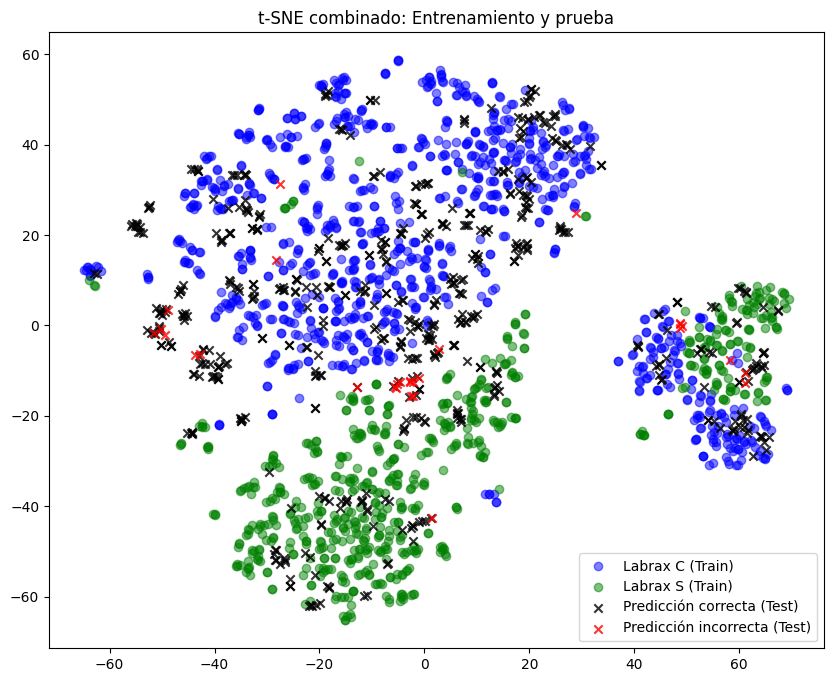

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

scaler = StandardScaler()
X_train = scaler.fit_transform(XTRAIN)
X_test = scaler.transform(XTEST)
y_train = np.array(yTRAIN)
y_test = 1 - np.array(yTEST)


param_grid = {
    'n_neighbors': [5, 7, 10, 15, 20],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Peso de los vecinos
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']  # Métricas de distancia
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,  # Validación cruzada
    scoring='accuracy',  # Métrica para evaluar
    verbose=1,
    n_jobs=-1  # Paralelizar la búsqueda
)

# Ajustar el modelo a los datos de entrenamiento
grid_search_knn.fit(X_train, y_train)

print("Mejores parámetros para KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print(f"Accuracy con el mejor KNN: {accuracy_score(y_test, y_pred_knn):.2f}")
print("Reporte de clasificación para KNN:")
print(classification_report(y_test, y_pred_knn))

# Aplicar t-SNE solo a los datos de entrenamiento
tsne = TSNE(n_components=2, random_state=42)
train_tsne = tsne.fit_transform(X_train)

indices = np.arange(len(y_test))
correct = (y_pred_knn == y_test)

all_embeddings = np.vstack((X_train, X_test))
all_labels = np.concatenate((y_train, y_test))
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
all_tsne = tsne.fit_transform(all_embeddings)

train_tsne = all_tsne[:len(X_train)]
test_tsne = all_tsne[len(X_train):]

# Graficar en el mismo espacio
plt.figure(figsize=(10, 8))
plt.scatter(
    train_tsne[np.where(y_train == 0), 0], train_tsne[np.where(y_train == 0), 1],
    c='blue', marker='o', label='Labrax C (Train)', alpha=0.5
)
plt.scatter(
    train_tsne[np.where(y_train == 1), 0], train_tsne[np.where(y_train == 1), 1],
    c='green', marker='o', label='Labrax S (Train)', alpha=0.5
)

plt.scatter(
    test_tsne[correct, 0], test_tsne[correct, 1],
    c='black', marker='x', label='Predicción correcta (Test)', alpha=0.8
)
plt.scatter(
    test_tsne[~correct, 0], test_tsne[~correct, 1],
    c='red', marker='x', label='Predicción incorrecta (Test)', alpha=0.8
)
plt.title("t-SNE combinado: Entrenamiento y prueba")
plt.legend()
plt.show()

In [69]:
text_labels_Sclusters = [
    # Cultivada
    "a close-up of a uniformly grey fish with reddish spots near its gills",
    "a close-up of a fish with a white ventral side that strongly contrasts with its grey body",
    "a close-up of a fish with an oval-shaped body and short pectoral fins that do not exceed the lateral line",
    "a close-up of a fish with fins that appear damaged or shortened and a faint or incomplete lateral line",
    "a close-up of a fish with a slightly upward-oriented mouth and a middle-positioned head",
    "a close-up of a fish with a grey body, white underside, and lateral fins that are damaged or appear eroded",

    # Salvaje
    "a close-up of a fish with a bright grey body and golden-yellow hue",
    "a close-up of a fish with color that gradually transitions to white on the ventral side",
    "a close-up of a fish with a straight body and a head featuring an angular contour",
    "a close-up of a fish with long pectoral fins that exceed the lateral line",
    "a close-up of a fish with a complete and clearly defined lateral line",
    "a close-up of a fish with a straight mouth positioned lower on its head"   
]
text_labels_Dclusters = [
    # Cultivada
    "a close-up of a dark grey fish that gradually lightens to a mostly white ventral side",
    "a close-up of a fish with a curved bottom",
    "a close-up of a fish with a gently sloping upper head contour ending at the mouth",
    "a close-up of a fish with a faint or incomplete lateral line",
    "a close-up of a fish in which the mouth is slightly tilted upwards",
    "a close-up of a fish with smaller fins close to the body",

    # Salvaje
    "a close-up of a fish with a grey body featuring greenish and golden-yellow hues that softly transition to white on the ventral side",
    "a close-up of a fish with a flat bottom",
    "a close-up of a fish with a sharply sloping upper head contour ending at the mouth",
    "a close-up of a fish with a complete and well-defined lateral line",
    "a close-up of a fish in which the mouth follows direction of the main axis of the body",
    "a close-up of a fish in which the lateral fins are separated from the body and oriented slightly backward and the dorsal fin is symmetrical"
]

text_inputs = torch.cat([clip.tokenize(label) for label in text_labels_Sclusters]).to(device)
text_inputs_2 = torch.cat([clip.tokenize(label) for label in text_labels_Dclusters]).to(device)

with torch.no_grad():
    text_features_Sclusters = model.encode_text(text_inputs)
    text_features_Dclusters = model.encode_text(text_inputs_2)

text_features_Sclusters_norm = text_features_Sclusters / text_features_Sclusters.norm(dim=-1, keepdim=True)
text_features_Dclusters_norm = text_features_Dclusters / text_features_Dclusters.norm(dim=-1, keepdim=True)

['SA100', 'SA128', 'SA122', 'SA111', 'SA119']
45
[93, 110, 106, 16, 105]
[48, 34, 32, 31, 31]


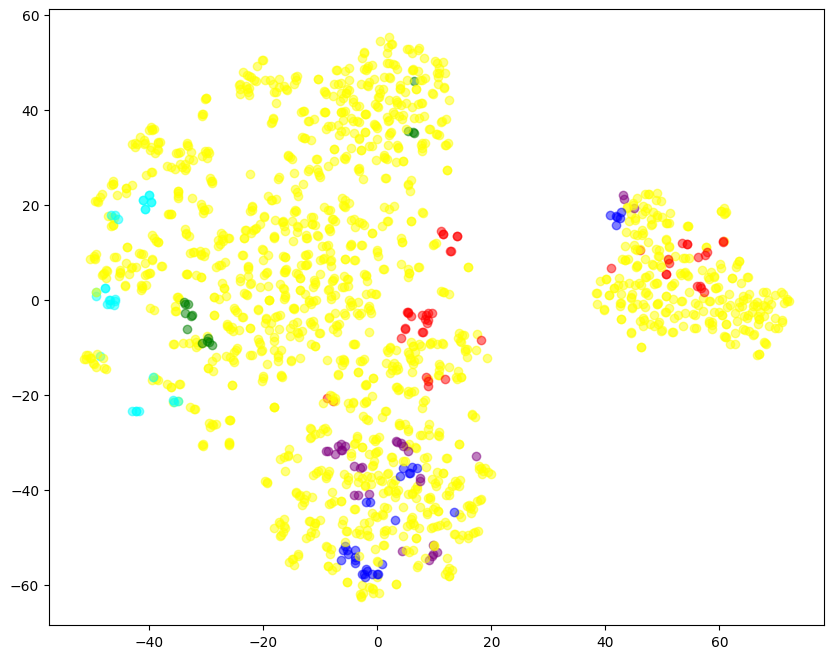

In [70]:
color_for_user = ['yellow'] * len(XTRAIN)

claves = list(dict_users_train_S.keys())
sorted_keys = sorted(claves, key=lambda key: len(dict_users_train_S[key]), reverse=True)

# Seleccionar las 5 claves más grandes
top_5_keys = sorted_keys[:5]
print(top_5_keys)

# Obtener las posiciones de esas claves en la lista original
top_5_positions = [claves.index(key) for key in top_5_keys]
print(claves.index('SA193'))

print(top_5_positions)

top_5_lengths = [len(dict_users_train_S[claves[pos]]) for pos in top_5_positions]
print(top_5_lengths)

if claves[93] in dict_users_train_S:
    for indice in dict_users_train_S[claves[93]]:
        color_for_user[indice] = 'red'
if claves[110] in dict_users_train_S:
    for indice in dict_users_train_S[claves[110]]:
        color_for_user[indice] = 'blue'
if claves[45] in dict_users_train_S:
    for indice in dict_users_train_S[claves[45]]:
        color_for_user[indice] = 'green'
if claves[16] in dict_users_train_S:
    for indice in dict_users_train_S[claves[16]]:
        color_for_user[indice] = 'cyan'
if claves[105] in dict_users_train_S:
    for indice in dict_users_train_S[claves[105]]:
        color_for_user[indice] = 'purple'

embeddings_S_prueba = np.concatenate((image_features_SS, image_features_SC), axis=0)
tsne = TSNE(n_components=2, random_state=42)
train_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(10, 8))

for i in range(len(train_tsne)):
    plt.scatter(train_tsne[i, 0], train_tsne[i, 1], color=color_for_user[i] ,alpha=0.5)

c:\Users\Tech4Diet\anaconda3\envs\clip_tf_env\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\Tech4Diet\anaconda3\envs\clip_tf_env\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


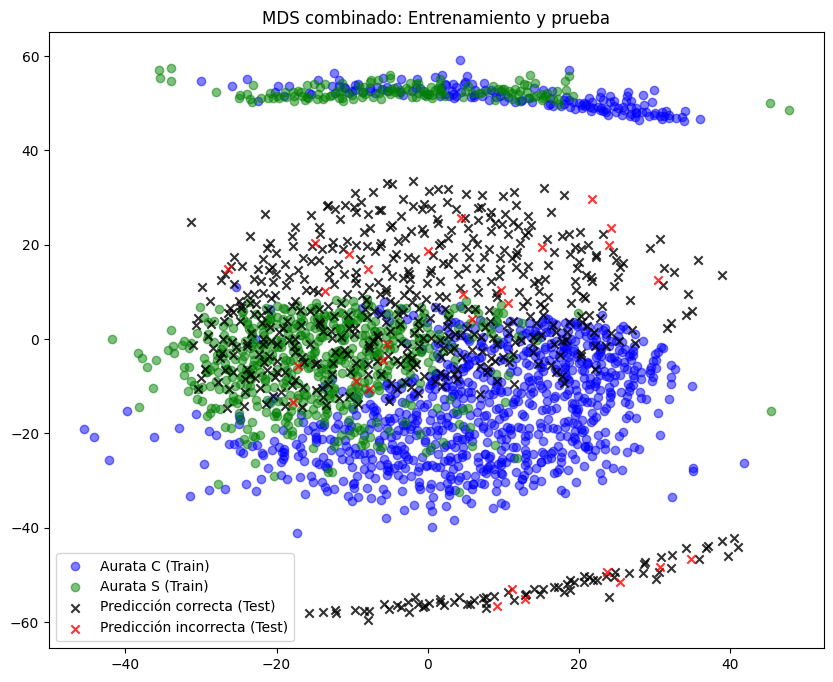

c:\Users\Tech4Diet\anaconda3\envs\clip_tf_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


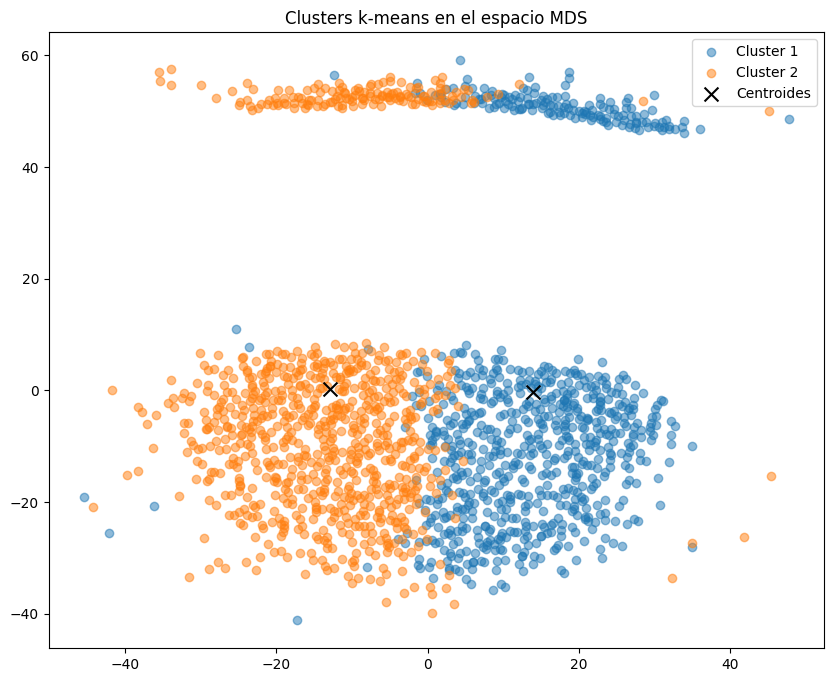

In [71]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Aplicar MDS a los datos de entrenamiento
mds = MDS(n_components=2, random_state=42)
train_mds = mds.fit_transform(X_train)
test_mds = mds.fit_transform(X_test)

# Graficar MDS
plt.figure(figsize=(10, 8))
plt.scatter(train_mds[y_train == 0, 0], train_mds[y_train == 0, 1], c='blue', label='Aurata C (Train)', alpha=0.5)
plt.scatter(train_mds[y_train == 1, 0], train_mds[y_train == 1, 1], c='green', label='Aurata S (Train)', alpha=0.5)
plt.scatter(test_mds[correct, 0], test_mds[correct, 1], c='black', marker='x', label='Predicción correcta (Test)', alpha=0.8)
plt.scatter(test_mds[~correct, 0], test_mds[~correct, 1], c='red', marker='x', label='Predicción incorrecta (Test)', alpha=0.8)
plt.title("MDS combinado: Entrenamiento y prueba")
plt.legend()
plt.show()

from sklearn.cluster import KMeans
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_S)

# Graficar MDS para los clusters
plt.figure(figsize=(10, 8))
for i in range(n_clusters):
    plt.scatter(train_mds[(clusters == i), 0], train_mds[(clusters == i), 1],
                label=f'Cluster {i + 1}', alpha=0.5)

# Calcular los centroides en el espacio MDS
centroids_mds = np.array([
    train_mds[(clusters == i)].mean(axis=0) for i in range(n_clusters)
])

# Añadir los centroides
plt.scatter(centroids_mds[:, 0], centroids_mds[:, 1], c='black', marker='x', s=100, label='Centroides')

plt.title("Clusters k-means en el espacio MDS")
plt.legend()
plt.show()

In [72]:
import numpy as np
from sklearn.metrics import pairwise_distances

# `embedings_SText` contiene pares (embedding, text_embedding)
# `text_labels_S` contiene los textos originales asociados a los embeddings en `text_features_S`

# Convertir los datos en arrays numpy
# Concatenar embeddings de imagen y texto antes de entrenar kmeans
XTRAIN_array = np.array([np.concatenate((emb.numpy(), text.numpy())) for emb, text in embedings_SText])
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(XTRAIN_array)

# Lista para almacenar los textos representativos
textos_representativos = []

for i in range(4):
    # Calculamos las distancias al centroide del clúster
    distances = pairwise_distances([kmeans.cluster_centers_[i]], XTRAIN_array)
    closest_point_idx = np.argmin(distances)  # Índice del punto más cercano

    # Recuperar el embedding de texto más cercano
    _, closest_text_embedding = embedings_SText[closest_point_idx]

    # Convertir embedding a texto original buscando el índice correspondiente en `text_features_S`
    similarity = (closest_text_embedding @ text_norm_S.T).softmax(dim=-1)
    text_idx = similarity.argmax().item()  # Índice del texto más similar
    texto_representativo = text_labels_S[text_idx]  # Mapea al texto original

    textos_representativos.append(texto_representativo)

# Mostrar los textos representativos
print("Textos representativos por clúster:")
for i, texto in enumerate(textos_representativos, 1):
    print(f"Clúster {i}: {texto}")

c:\Users\Tech4Diet\anaconda3\envs\clip_tf_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Textos representativos por clúster:
Clúster 1: a close-up of a fish with fins that appear damaged or shortened and a faint or incomplete lateral line
Clúster 2: a close-up of a fish with a grey body, white underside, and lateral fins that are damaged or appear eroded
Clúster 3: a close-up of a fish with fins that appear damaged or shortened and a faint or incomplete lateral line
Clúster 4: a close-up of a fish with fins that appear damaged or shortened and a faint or incomplete lateral line


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores parámetros para Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Accuracy con Random Forest: 0.94
Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       439
           1       0.88      0.88      0.88       144

    accuracy                           0.94       583
   macro avg       0.92      0.92      0.92       583
weighted avg       0.94      0.94      0.94       583



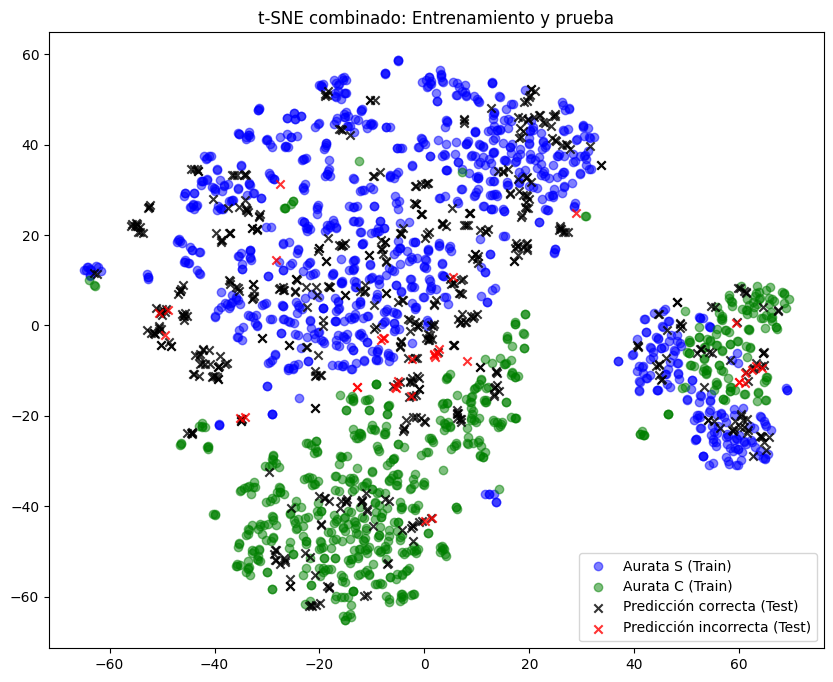

31
31


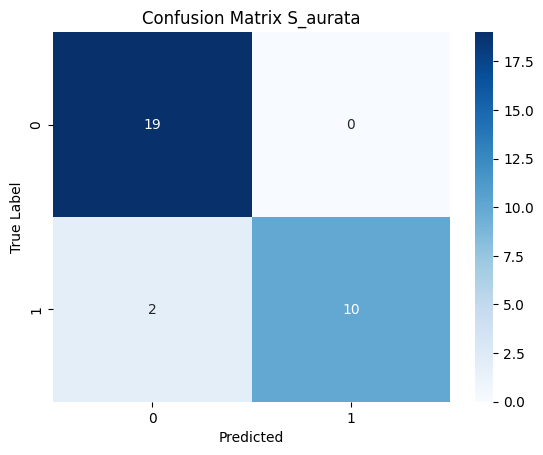

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_train = scaler.fit_transform(XTRAIN)
X_test = scaler.transform(XTEST)
y_train = np.array(yTRAIN)
y_test = 1 - np.array(yTEST)

# Definir grid de hiperparámetros para Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # Validación cruzada
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Paralelización
)

grid_search_rf.fit(X_train, y_train)

print("Mejores parámetros para Random Forest:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)

print(f"Accuracy con Random Forest: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Reporte de clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf))

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
all_embeddings = np.vstack((X_train, X_test))
all_labels = np.concatenate((y_train, y_test))
all_tsne = tsne.fit_transform(all_embeddings)

train_tsne = all_tsne[:len(X_train)]
test_tsne = all_tsne[len(X_train):]

plt.figure(figsize=(10, 8))
plt.scatter(
    train_tsne[np.where(y_train == 0), 0], train_tsne[np.where(y_train == 0), 1],
    c='blue', marker='o', label='Aurata S (Train)', alpha=0.5
)
plt.scatter(
    train_tsne[np.where(y_train == 1), 0], train_tsne[np.where(y_train == 1), 1],
    c='green', marker='o', label='Aurata C (Train)', alpha=0.5
)

correct = (y_pred_rf == y_test)
plt.scatter(
    test_tsne[correct, 0], test_tsne[correct, 1],
    c='black', marker='x', label='Predicción correcta (Test)', alpha=0.8
)
plt.scatter(
    test_tsne[~correct, 0], test_tsne[~correct, 1],
    c='red', marker='x', label='Predicción incorrecta (Test)', alpha=0.8
)
plt.title("t-SNE combinado: Entrenamiento y prueba")
plt.legend()
plt.show()

users_test_label_S=[]
users_y_pred_S=[]

for _, indices in dict_users_S.items():
  users_test_label_S.append(sum([y_test[i] for i in indices])/len(indices))
  users_y_pred_S.append(sum([y_pred_knn[i] for i in indices])/len(indices))

# Discretizar los valores continuos
users_test_label_S_discrete = [1 if label >= 0.5 else 0 for label in users_test_label_S]
users_y_pred_S_discrete = [1 if pred >= 0.5 else 0 for pred in users_y_pred_S]

print(len(users_test_label_S_discrete))
print(len(users_y_pred_S_discrete))

# Calcular la matriz de confusión
cm = confusion_matrix(users_test_label_S_discrete, users_y_pred_S_discrete)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix S_aurata')
plt.show()

Fitting 5 folds for each of 45 candidates, totalling 225 fits

Mejores parámetros encontrados:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Accuracy del mejor modelo: 0.98

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       439
           1       0.94      0.99      0.96       144

    accuracy                           0.98       583
   macro avg       0.97      0.98      0.98       583
weighted avg       0.98      0.98      0.98       583



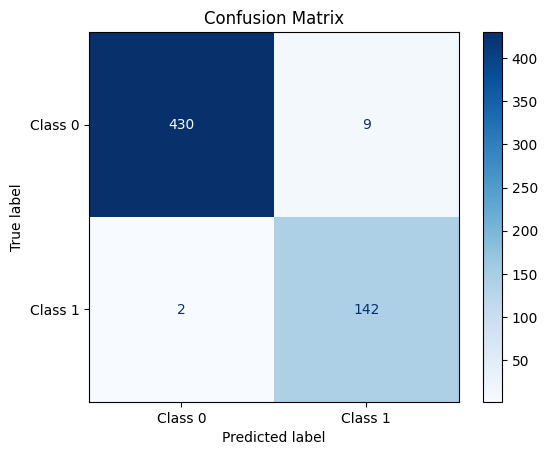

31
31


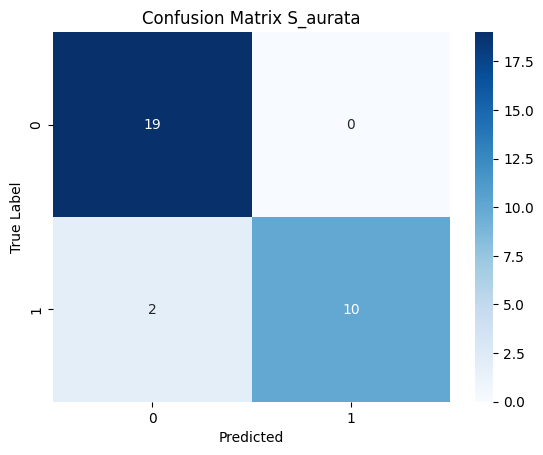

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(XTRAIN)
X_test_scaled = scaler.transform(XTEST)
y_train = np.array(yTRAIN)
y_test = 1 - np.array(yTEST)

# Configuración del GridSearchCV para SVC
param_grid = {
    'C': [0.1, 1, 10],  # Valores del parámetro de penalización
    'gamma': [0.01, 0.1, 1, 'scale', 'auto'],  # Valores del coeficiente del kernel
    'kernel': ['linear', 'rbf', 'poly']  # Tipos de kernel
}

grid_search = GridSearchCV(
    estimator=SVC(),  # Modelo SVC
    param_grid=param_grid, 
    cv=5,  # Validación cruzada con 5 particiones
    verbose=1, 
    n_jobs=-1  # Paralelización
)

grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("\nMejores parámetros encontrados:")
print(best_params)

model_svc = grid_search.best_estimator_
y_pred = model_svc.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy del mejor modelo: {accuracy:.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

users_test_label_S=[]
users_y_pred_S=[]

for _, indices in dict_users_S.items():
  users_test_label_S.append(sum([y_test[i] for i in indices])/len(indices))
  users_y_pred_S.append(sum([y_pred_knn[i] for i in indices])/len(indices))

# Discretizar los valores continuos
users_test_label_S_discrete = [1 if label >= 0.5 else 0 for label in users_test_label_S]
users_y_pred_S_discrete = [1 if pred >= 0.5 else 0 for pred in users_y_pred_S]

print(len(users_test_label_S_discrete))
print(len(users_y_pred_S_discrete))

# Calcular la matriz de confusión
cm = confusion_matrix(users_test_label_S_discrete, users_y_pred_S_discrete)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix S_aurata')
plt.show()

In [75]:
colors = [
    'red',      # Rojo
    'blue',     # Azul
    'green',    # Verde
    'orange',   # Naranja
    'purple',   # Púrpura
    'brown',    # Marrón
    
    'pink',     # Rosa
    'gray',     # Gris
    'olive',    # Oliva
    'cyan',     # Cian
    'gold',     # Dorado
    'teal'      # Verde azulado
]
p_colors=[]

for punto in XTRAIN:
    embIMG=torch.from_numpy(punto[:512])
    embIMG_norm = embIMG / embIMG.norm(dim=-1, keepdim=True)
    similarity = (100.0 * embIMG_norm @ text_features_Sclusters_norm.T).softmax(dim=-1)
    _ , indices = similarity.topk(12)
    p_colors.append(colors[indices[0]])

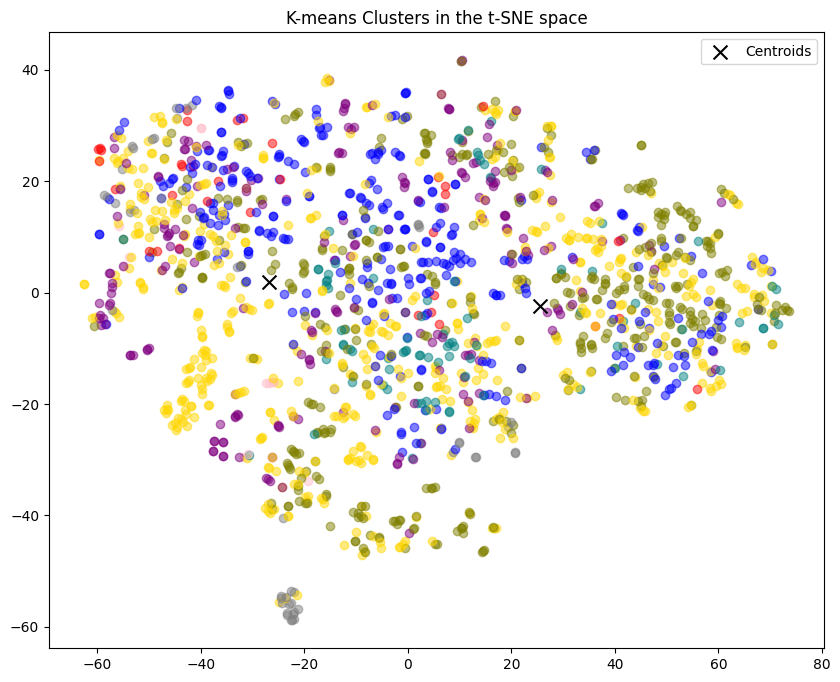

In [76]:
embeddings_S_prueba = np.concatenate((image_features_SS, image_features_SC), axis=0)
tsne = TSNE(n_components=2, random_state=42)
train_tsne = tsne.fit_transform(embeddings_S)

plt.figure(figsize=(10, 8))

for i in range(len(train_tsne)):
    plt.scatter(train_tsne[i, 0], train_tsne[i, 1], color=p_colors[i] ,alpha=0.5)

# Calcular los centroides en el espacio t-SNE
centroids_tsne = np.array([
    train_tsne[(clusters == i)].mean(axis=0) for i in range(n_clusters)
])

# Añadir los centroides
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.title("K-means Clusters in the t-SNE space")
plt.legend()
plt.show()

['SA100', 'SA128', 'SA122', 'SA111', 'SA119']
45
[93, 110, 106, 16, 105]
[48, 34, 32, 31, 31]


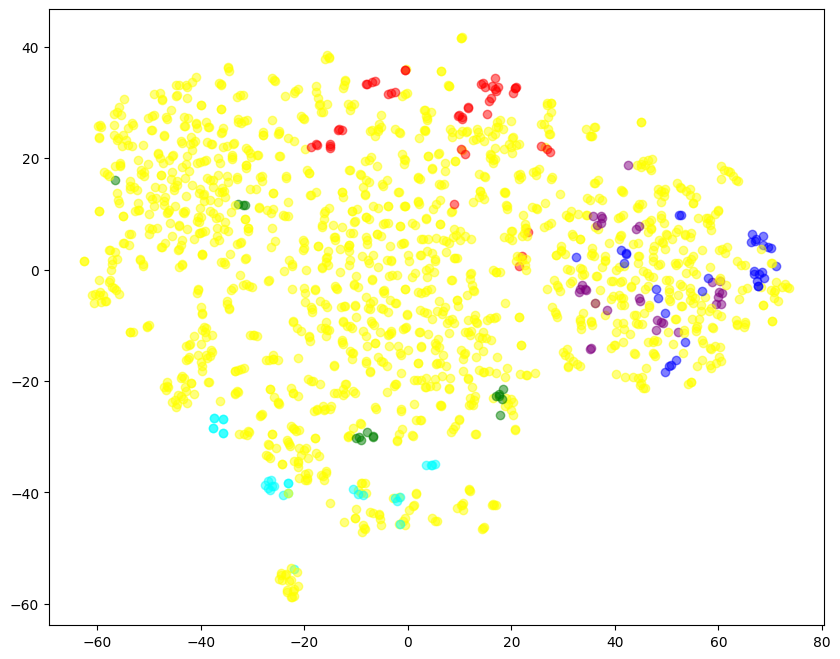

In [77]:
color_for_user = ['yellow'] * len(XTRAIN)

claves = list(dict_users_train_S.keys())
sorted_keys = sorted(claves, key=lambda key: len(dict_users_train_S[key]), reverse=True)

# Seleccionar las 5 claves más grandes
top_5_keys = sorted_keys[:5]
print(top_5_keys)

# Obtener las posiciones de esas claves en la lista original
top_5_positions = [claves.index(key) for key in top_5_keys]
print(claves.index('SA193'))

print(top_5_positions)

top_5_lengths = [len(dict_users_train_S[claves[pos]]) for pos in top_5_positions]
print(top_5_lengths)

if claves[93] in dict_users_train_S:
    for indice in dict_users_train_S[claves[93]]:
        color_for_user[indice] = 'red'
if claves[110] in dict_users_train_S:
    for indice in dict_users_train_S[claves[110]]:
        color_for_user[indice] = 'blue'
if claves[45] in dict_users_train_S:
    for indice in dict_users_train_S[claves[45]]:
        color_for_user[indice] = 'green'
if claves[16] in dict_users_train_S:
    for indice in dict_users_train_S[claves[16]]:
        color_for_user[indice] = 'cyan'
if claves[105] in dict_users_train_S:
    for indice in dict_users_train_S[claves[105]]:
        color_for_user[indice] = 'purple'

embeddings_S_prueba = np.concatenate((image_features_SS, image_features_SC), axis=0)
tsne = TSNE(n_components=2, random_state=42)
train_tsne = tsne.fit_transform(embeddings_S)

plt.figure(figsize=(10, 8))

for i in range(len(train_tsne)):
    plt.scatter(train_tsne[i, 0], train_tsne[i, 1], color=color_for_user[i] ,alpha=0.5)

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight

model = Sequential()

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print(class_weights)

model.add(Dense(128, input_dim=X_train.shape[1],use_bias=True))
#model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='loss',  # Monitorea la pérdida de entrenamiento (sin validación)
    mode='min',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='loss',
    factor=0.1,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(XTRAIN)
X_test_scaled = scaler.transform(XTEST)
y_train = np.array(yTRAIN)
y_test = 1 - np.array(yTEST)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])

{0: 0.831, 1: 1.255287009063444}
Epoch 1/100
52/52 [==============================] - 1s 2ms/step - loss: 0.2021 - accuracy: 0.9242 - lr: 0.0010
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9826 - lr: 0.0010
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9868 - lr: 0.0010
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9904 - lr: 0.0010
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9868 - lr: 0.0010
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9952 - lr: 0.0010
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9958 - lr: 0.0010
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9982 - lr: 0.0010
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

# Calcular pesos para clases desbalanceadas
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# Crear el modelo de Linear Probe
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))  # Clasificador lineal

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks para el entrenamiento
early_stopping = EarlyStopping(
    monitor='loss',
    mode='min',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(XTRAIN)
X_test_scaled = scaler.transform(XTEST)

# Entrenar el modelo
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stopping]
)


Epoch 1/100
52/52 [==============================] - 0s 1ms/step - loss: 0.2178 - accuracy: 0.9236
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0998 - accuracy: 0.9741
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9819
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0613 - accuracy: 0.9862
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.9862
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0484 - accuracy: 0.9874
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9904
Epoch 8/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0381 - accuracy: 0.9904
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0345 - accuracy: 0.9922
Epoch 10/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9916
Epoch 11/

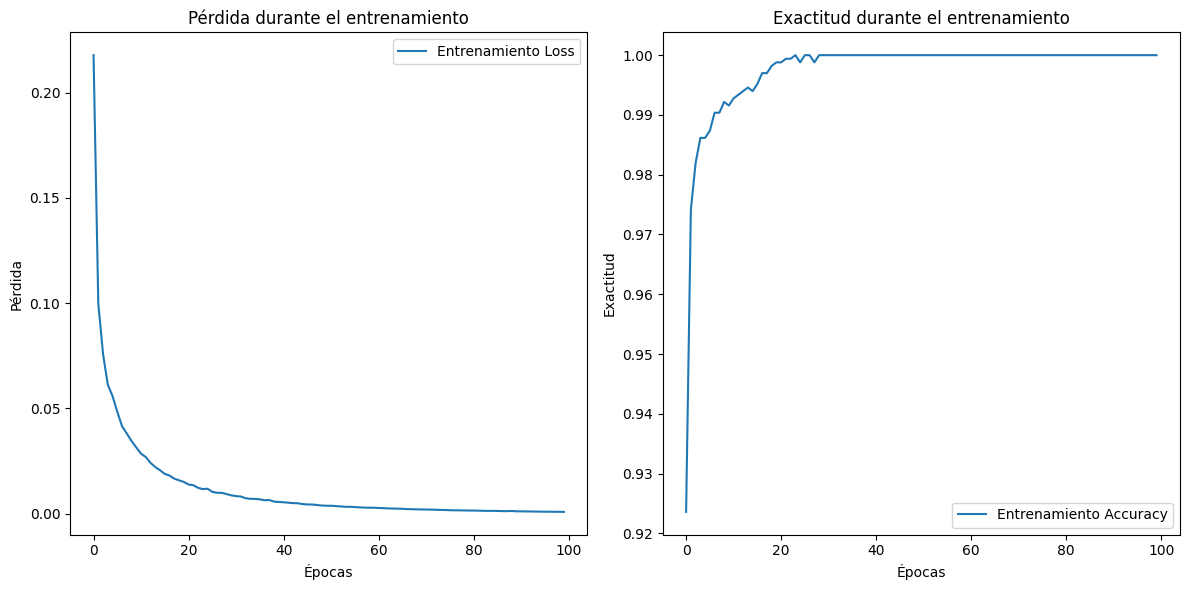

In [80]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento Loss')
#plt.plot(history.history['val_loss'], label='Validación Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validación Accuracy')
plt.title('Exactitud durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()

plt.tight_layout()
plt.show()


Test Loss: 0.0817
Test Accuracy: 0.9657
19/19 [==============================] - 0s 611us/step

Matriz de confusión (General):


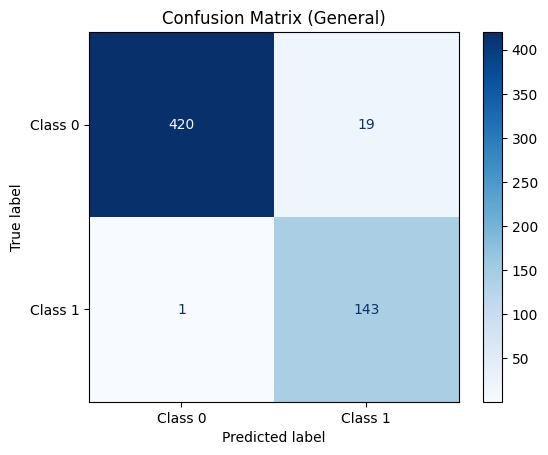


Reporte de clasificación (General):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       439
           1       0.88      0.99      0.93       144

    accuracy                           0.97       583
   macro avg       0.94      0.97      0.96       583
weighted avg       0.97      0.97      0.97       583


Matriz de confusión (Por usuario):


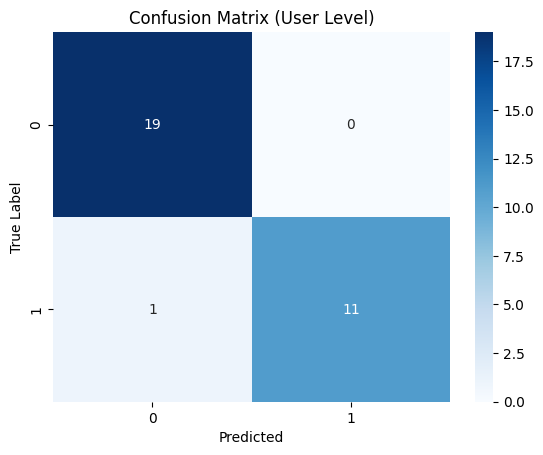


Accuracy por usuario: 0.97

Reporte de clasificación (Por usuario):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.92      0.96        12

    accuracy                           0.97        31
   macro avg       0.97      0.96      0.97        31
weighted avg       0.97      0.97      0.97        31



In [81]:
# Evaluación en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predicciones en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Matriz de confusión normal
print("\nMatriz de confusión (General):")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (General)")
plt.show()

# Reporte de clasificación
print("\nReporte de clasificación (General):")
print(classification_report(y_test, y_pred))

# Evaluación por individuo
users_test_label_S = []
users_y_pred_S = []

for _, indices in dict_users_S.items():
    # Calcular promedio de etiquetas reales y predicciones por usuario
    users_test_label_S.append(np.mean([y_test[i] for i in indices]))
    users_y_pred_S.append(np.mean([y_pred[i] for i in indices]))

# Discretizar valores continuos
users_test_label_S_discrete = [1 if label >= 0.5 else 0 for label in users_test_label_S]
users_y_pred_S_discrete = [1 if pred >= 0.5 else 0 for pred in users_y_pred_S]

# Verificar tamaños consistentes
assert len(users_test_label_S_discrete) == len(users_y_pred_S_discrete), "Error: Los tamaños no coinciden."

# Matriz de confusión por individuo
print("\nMatriz de confusión (Por usuario):")
cm_users = confusion_matrix(users_test_label_S_discrete, users_y_pred_S_discrete)
sns.heatmap(cm_users, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix (User Level)')
plt.show()

# Métricas a nivel de usuario
accuracy_users = accuracy_score(users_test_label_S_discrete, users_y_pred_S_discrete)
print(f"\nAccuracy por usuario: {accuracy_users:.2f}")
print("\nReporte de clasificación (Por usuario):")
print(classification_report(users_test_label_S_discrete, users_y_pred_S_discrete))

In [82]:
XEscap_S_scaled = scaler.transform(XEscap_S)
y_escapS = model.predict(XEscap_S_scaled)
y_escapS = (y_escapS > 0.5).astype(int).flatten()
count_0, count_1 = np.bincount(y_escapS)

print("Cautivos: "+str(count_0))
print("salvajes: "+str(count_1))

7/7 [==============================] - 0s 1ms/step
Cautivos: 137
salvajes: 56


Usuarios cautivos: 12
Usuarios salvajes: 16


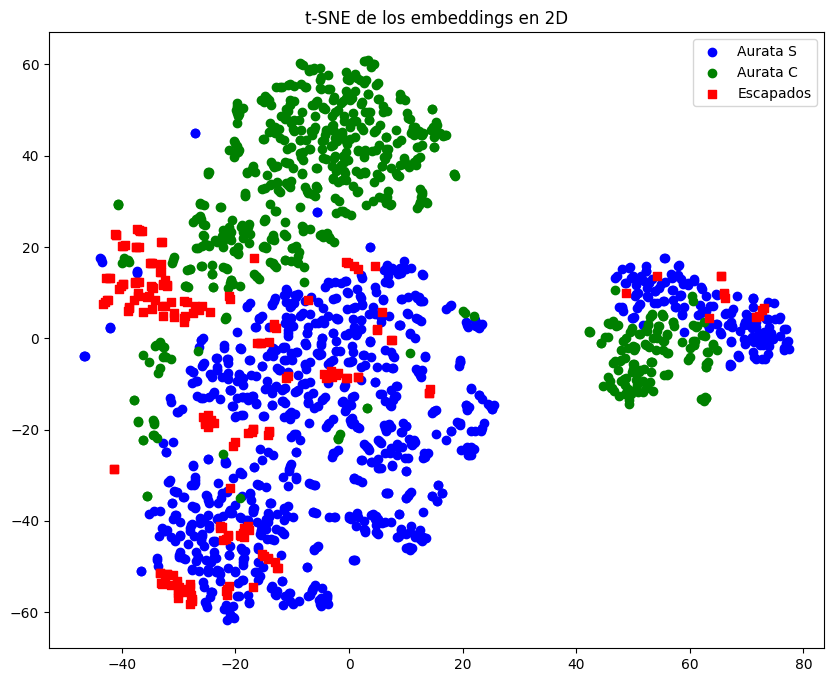

In [83]:
users_y_pred_ES_S = []
for _ , indices in dict_users_ES_S.items():
    users_y_pred_ES_S.append(np.mean([y_escapS[i] for i in indices]))
users_y_pred_ES_S_discrete = [1 if pred >= 0.5 else 0 for pred in users_y_pred_ES_S]
count_0, count_1 = np.bincount(users_y_pred_ES_S_discrete)

print("Usuarios cautivos: "+str(count_0))
print("Usuarios salvajes: "+str(count_1))

ALL_embeddings_S = np.concatenate((XTRAIN, XEscap_S), axis=0)

labels_ES_Slabels_S = np.concatenate((np.zeros(len(image_features_SS)),  # Aurata S (imágenes)
                         np.ones(len(image_features_SC)),   # Aurata C (imágenes)
                         np.ones(len(XEscap_S))*2))  # Embeddings de texto: "Aurata S" y "Aurata C"


tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_S_tsne = tsne.fit_transform(ALL_embeddings_S)

plt.figure(figsize=(10, 8))


plt.scatter(embeddings_S_tsne[(labels_ES_Slabels_S == 0), 0], embeddings_S_tsne[(labels_ES_Slabels_S == 0), 1],
            c='blue', marker='o', label='Aurata S')


plt.scatter(embeddings_S_tsne[(labels_ES_Slabels_S == 1), 0], embeddings_S_tsne[(labels_ES_Slabels_S == 1), 1],
            c='green', marker='o', label='Aurata C')


plt.scatter(embeddings_S_tsne[(labels_ES_Slabels_S == 2), 0], embeddings_S_tsne[(labels_ES_Slabels_S == 2), 1],
            c='red', marker='s', label='Escapados')


plt.title("t-SNE de los embeddings en 2D")
plt.legend()
plt.show()

# D_LABRAX

In [90]:
XTRAIN=embedings_DText
XTEST=embeddings_DText_test
labels_D = np.concatenate((np.zeros(len(image_features_DS)),  # Aurata S (imágenes)
                         np.ones(len(image_features_DC))), axis=0)  # Embeddings de texto: "Aurata S" y "Aurata C"
yTRAIN=labels_D
yTEST=test_label_D

XTRAIN = [np.concatenate((emb.numpy(), text.numpy())) for emb, text in embedings_DText]
XTEST = [np.concatenate((emb.numpy(), text.numpy())) for emb, text in embeddings_DText_test]

print(np.array(XTRAIN).shape)

yTRAIN = np.array(yTRAIN)
yTEST = np.array(yTEST)

(1316, 1024)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Mejores parámetros para KNN: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
Accuracy con el mejor KNN: 0.90
Reporte de clasificación para KNN:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        76
           1       0.93      0.94      0.93       211

    accuracy                           0.90       287
   macro avg       0.88      0.87      0.87       287
weighted avg       0.90      0.90      0.90       287



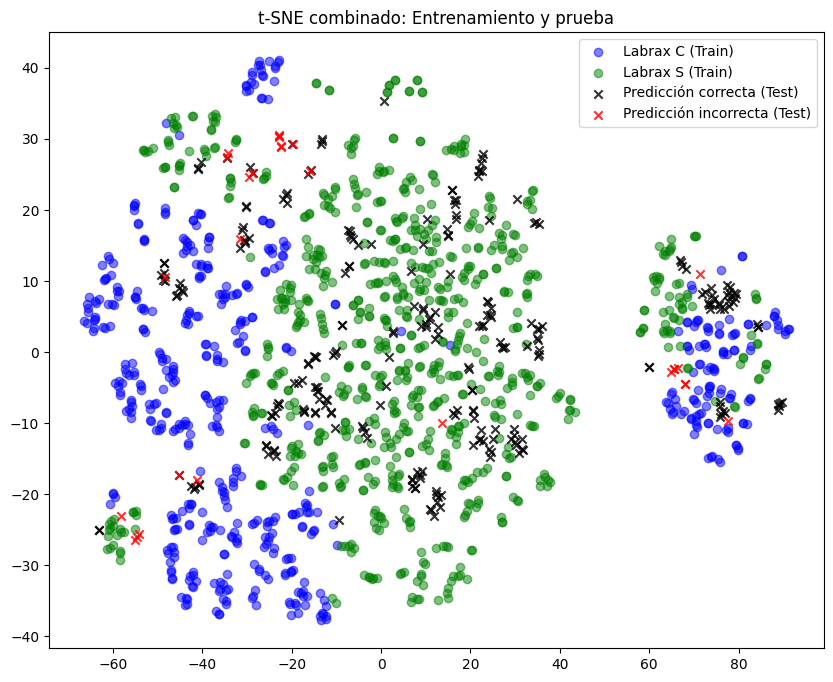

23
23


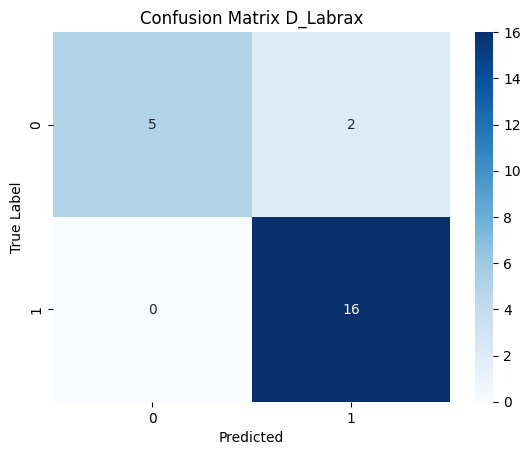

In [91]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

scaler = StandardScaler()
X_train = scaler.fit_transform(XTRAIN)
X_test = scaler.transform(XTEST)
y_train = np.array(yTRAIN)
y_test = 1 - np.array(yTEST)


param_grid = {
    'n_neighbors': [5, 7, 10, 15, 20],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Peso de los vecinos
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']  # Métricas de distancia
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,  # Validación cruzada
    scoring='accuracy',  # Métrica para evaluar
    verbose=1,
    n_jobs=-1  # Paralelizar la búsqueda
)

# Ajustar el modelo a los datos de entrenamiento
grid_search_knn.fit(X_train, y_train)

print("Mejores parámetros para KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print(f"Accuracy con el mejor KNN: {accuracy_score(y_test, y_pred_knn):.2f}")
print("Reporte de clasificación para KNN:")
print(classification_report(y_test, y_pred_knn))

# Aplicar t-SNE solo a los datos de entrenamiento
tsne = TSNE(n_components=2, random_state=42)
train_tsne = tsne.fit_transform(X_train)

indices = np.arange(len(y_test))
correct = (y_pred_knn == y_test)

all_embeddings = np.vstack((X_train, X_test))
all_labels = np.concatenate((y_train, y_test))
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
all_tsne = tsne.fit_transform(all_embeddings)

train_tsne = all_tsne[:len(X_train)]
test_tsne = all_tsne[len(X_train):]

# Graficar en el mismo espacio
plt.figure(figsize=(10, 8))
plt.scatter(
    train_tsne[np.where(y_train == 0), 0], train_tsne[np.where(y_train == 0), 1],
    c='blue', marker='o', label='Labrax C (Train)', alpha=0.5
)
plt.scatter(
    train_tsne[np.where(y_train == 1), 0], train_tsne[np.where(y_train == 1), 1],
    c='green', marker='o', label='Labrax S (Train)', alpha=0.5
)

plt.scatter(
    test_tsne[correct, 0], test_tsne[correct, 1],
    c='black', marker='x', label='Predicción correcta (Test)', alpha=0.8
)
plt.scatter(
    test_tsne[~correct, 0], test_tsne[~correct, 1],
    c='red', marker='x', label='Predicción incorrecta (Test)', alpha=0.8
)
plt.title("t-SNE combinado: Entrenamiento y prueba")
plt.legend()
plt.show()

users_test_label_D=[]
users_y_pred_D=[]

for _, indices in dict_users_D.items():
  users_test_label_D.append(sum([y_test[i] for i in indices])/len(indices))
  users_y_pred_D.append(sum([y_pred_knn[i] for i in indices])/len(indices))

# Discretizar los valores continuos
users_test_label_D_discrete = [1 if label >= 0.5 else 0 for label in users_test_label_D]
users_y_pred_D_discrete = [1 if pred >= 0.5 else 0 for pred in users_y_pred_D]

print(len(users_test_label_D_discrete))
print(len(users_y_pred_D_discrete))

# Calcular la matriz de confusión
cm = confusion_matrix(users_test_label_D_discrete, users_y_pred_D_discrete)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix D_Labrax')
plt.show()

c:\Users\Tech4Diet\anaconda3\envs\clip_tf_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Adjusted Rand Index (ARI): 0.05
Silhouette Score: 0.58


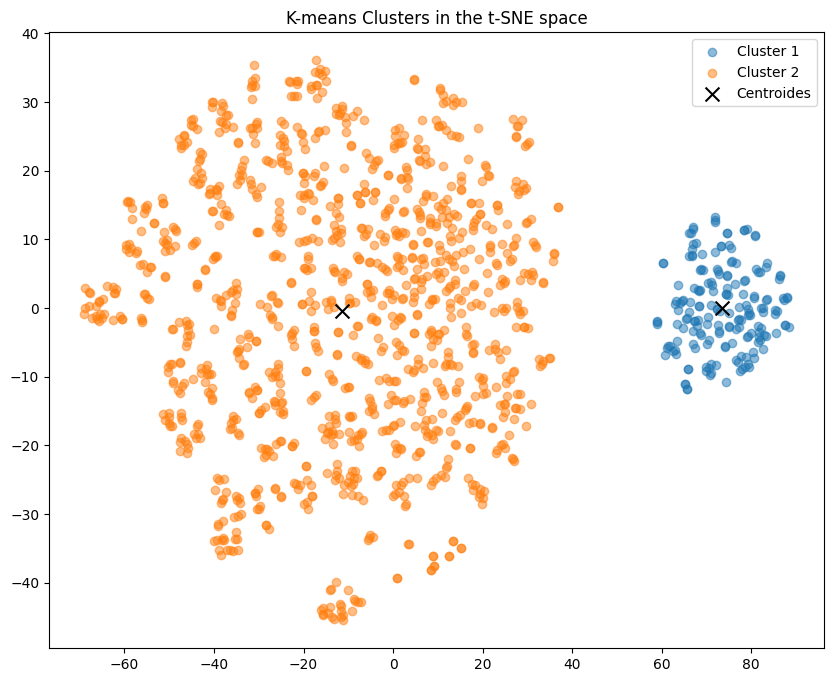

Matriz de confusión:
[[114 411]
 [ 67 724]]
Textos representativos por clúster:
Clúster 1:
  - a close-up of a fish in which the lateral fins are separated from the body and oriented slightly backward and the dorsal fin is symmetrical
  - a close-up of a dark grey fish that gradually lightens to a mostly white ventral side
Clúster 2:
  - a close-up of a dark grey fish that gradually lightens to a mostly white ventral side
  - a close-up of a fish in which the lateral fins are separated from the body and oriented slightly backward and the dorsal fin is symmetrical


In [94]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Escalar los embeddings
scaler = StandardScaler()
embeddings_D = scaler.fit_transform(XTRAIN)

# Aplicar k-means con 3 clusters
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_D)

# Evaluar el resultado de k-means
ari = adjusted_rand_score(yTRAIN, clusters)
silhouette = silhouette_score(embeddings_D, clusters)

print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")


tsne = TSNE(n_components=2, random_state=42)
train_tsne = tsne.fit_transform(embeddings_D)

plt.figure(figsize=(10, 8))
for i in range(n_clusters):
    plt.scatter(train_tsne[(clusters == i), 0], train_tsne[(clusters == i), 1],
                label=f'Cluster {i + 1}', alpha=0.5)

# Calcular los centroides en el espacio t-SNE
centroids_tsne = np.array([
    train_tsne[(clusters == i)].mean(axis=0) for i in range(n_clusters)
])

# Añadir los centroides
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], c='black', marker='x', s=100, label='Centroides')

plt.title("K-means Clusters in the t-SNE space")
plt.legend()
plt.show()

# Matriz de confusión entre clusters y etiquetas reales
print("Matriz de confusión:")
print(confusion_matrix(yTRAIN, clusters))

# Selección de múltiples textos representativos por clúster
num_representatives = 3  # Número de textos por clúster
textos_representativos_por_cluster = []
XTRAIN_array = np.array([np.concatenate((emb.numpy(), text.numpy())) for emb, text in embedings_DText])

for i in range(n_clusters):
    # Calcular las distancias al centroide del clúster
    distances = pairwise_distances([kmeans.cluster_centers_[i]], XTRAIN_array)
    
    # Obtener los índices de los puntos más cercanos al centroide
    closest_points_idx = np.argsort(distances[0])
    selected_text_indices = set()  # Para evitar seleccionar el mismo texto más de una vez
    
    # Lista temporal para los textos representativos del clúster actual
    textos_representativos = []
    for idx in closest_points_idx:
        if len(textos_representativos) >= num_representatives:
            break
        
        # Recuperar el embedding de texto más cercano
        _, closest_text_embedding = embedings_DText[idx]

        # Convertir embedding a texto original buscando el índice correspondiente en `text_features_S`
        similarity = (closest_text_embedding @ text_norm_D.T).softmax(dim=-1)
        text_idx = similarity.argmax().item()  # Índice del texto más similar
        
        # Asegurar que el índice de texto no haya sido seleccionado antes
        if text_idx not in selected_text_indices:
            texto_representativo = text_labels_D[text_idx]  # Mapea al texto original
            textos_representativos.append(texto_representativo)
            selected_text_indices.add(text_idx)  # Marcar este índice como utilizado
    
    # Añadir los textos representativos del clúster a la lista principal
    textos_representativos_por_cluster.append(textos_representativos)

# Mostrar los textos representativos por clúster
print("Textos representativos por clúster:")
for i, textos in enumerate(textos_representativos_por_cluster, 1):
    print(f"Clúster {i}:")
    for texto in textos:
        print(f"  - {texto}")

In [95]:
colors = [
    'red',      # Rojo
    'blue',     # Azul
    'green',    # Verde
    'orange',   # Naranja
    'purple',   # Púrpura
    'brown',    # Marrón
    
    'pink',     # Rosa
    'gray',     # Gris
    'olive',    # Oliva
    'cyan',     # Cian
    'gold',     # Dorado
    'teal'      # Verde azulado
]
p_colors=[]

for punto in XTRAIN:
    embIMG=torch.from_numpy(punto[:512])
    embIMG_norm = embIMG / embIMG.norm(dim=-1, keepdim=True)
    similarity = (100.0 * embIMG_norm @ text_features_Dclusters_norm.T).softmax(dim=-1)
    _ , indices = similarity.topk(12)
    p_colors.append(colors[indices[0]])

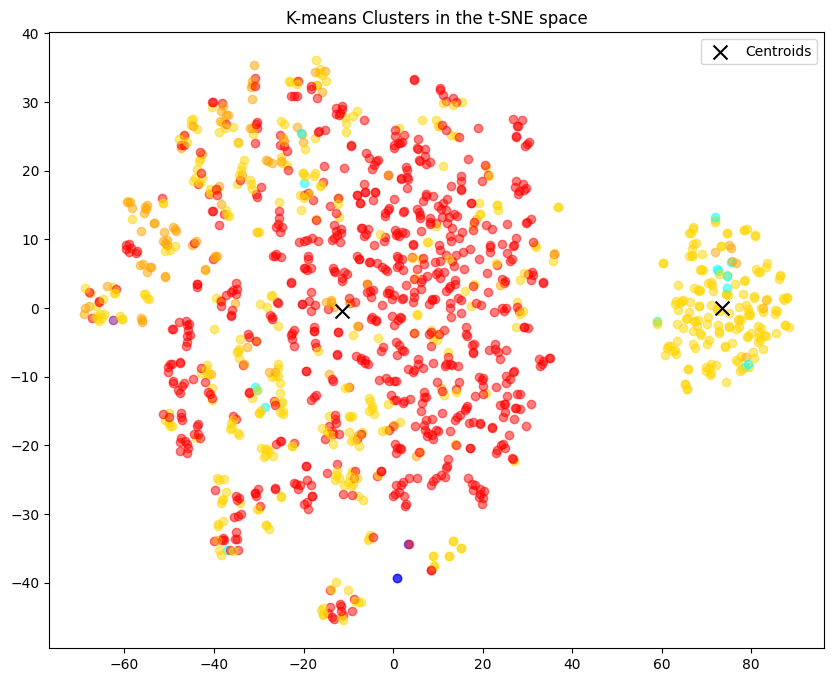

In [96]:
embeddings_S_prueba = np.concatenate((image_features_SS, image_features_SC), axis=0)
tsne = TSNE(n_components=2, random_state=42)
train_tsne = tsne.fit_transform(embeddings_D)

plt.figure(figsize=(10, 8))

for i in range(len(train_tsne)):
    plt.scatter(train_tsne[i, 0], train_tsne[i, 1], color=p_colors[i] ,alpha=0.5)

# Calcular los centroides en el espacio t-SNE
centroids_tsne = np.array([
    train_tsne[(clusters == i)].mean(axis=0) for i in range(n_clusters)
])

# Añadir los centroides
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.title("K-means Clusters in the t-SNE space")
plt.legend()
plt.show()

In [97]:
colors = [
    'blue',     # Rosa
    'blue',     # Gris
    'blue',    # Oliva
    'blue',     # Cian
    'blue',     # Dorado
    'blue',      # Verde azulado
    'red',      # Rojo
    'red',     # Azul
    'red',    # Verde
    'red',   # Naranja
    'red',   # Púrpura
    'red',    # Marrón
]
p_colors=[]

for punto in XTRAIN:
    embIMG=torch.from_numpy(punto[:512])
    embIMG_norm = embIMG / embIMG.norm(dim=-1, keepdim=True)
    similarity = (100.0 * embIMG_norm @ text_features_Dclusters_norm.T).softmax(dim=-1)
    _ , indices = similarity.topk(12)
    p_colors.append(colors[indices[0]])

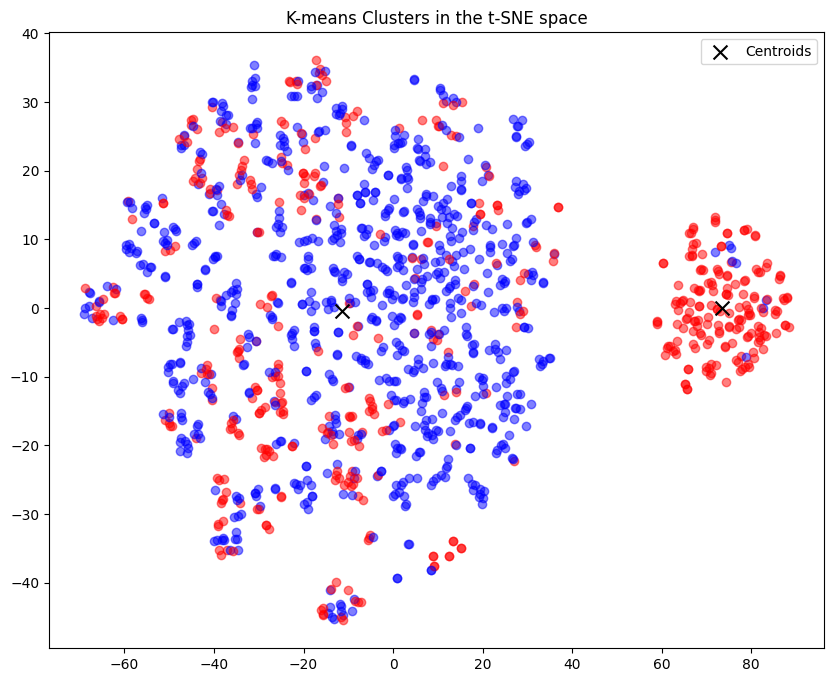

In [98]:
embeddings_S_prueba = np.concatenate((image_features_SS, image_features_SC), axis=0)
tsne = TSNE(n_components=2, random_state=42)
train_tsne = tsne.fit_transform(embeddings_D)

plt.figure(figsize=(10, 8))

for i in range(len(train_tsne)):
    plt.scatter(train_tsne[i, 0], train_tsne[i, 1], color=p_colors[i] ,alpha=0.5)

# Calcular los centroides en el espacio t-SNE
centroids_tsne = np.array([
    train_tsne[(clusters == i)].mean(axis=0) for i in range(n_clusters)
])

# Añadir los centroides
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.title("K-means Clusters in the t-SNE space")
plt.legend()
plt.show()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores parámetros para Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy con Random Forest: 0.87
Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73        76
           1       0.88      0.95      0.92       211

    accuracy                           0.87       287
   macro avg       0.85      0.80      0.82       287
weighted avg       0.87      0.87      0.87       287



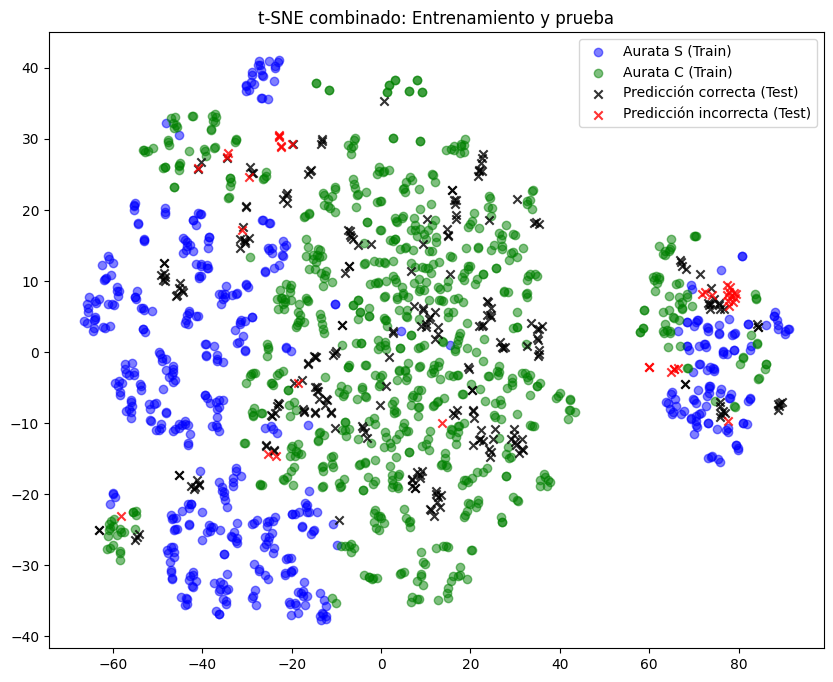

23
23


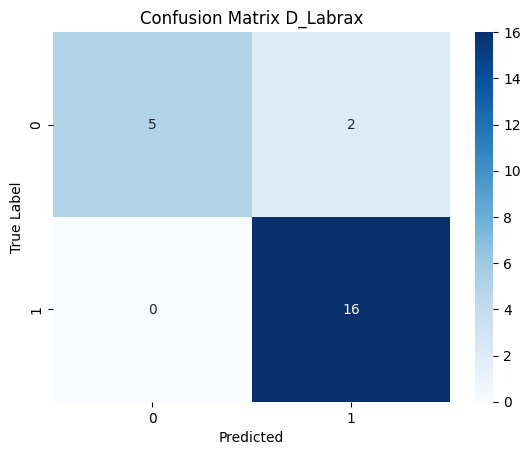

In [99]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_train = scaler.fit_transform(XTRAIN)
X_test = scaler.transform(XTEST)
y_train = np.array(yTRAIN)
y_test = 1 - np.array(yTEST)

# Definir grid de hiperparámetros para Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # Validación cruzada
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Paralelización
)

grid_search_rf.fit(X_train, y_train)

print("Mejores parámetros para Random Forest:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)

print(f"Accuracy con Random Forest: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Reporte de clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf))

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
all_embeddings = np.vstack((X_train, X_test))
all_labels = np.concatenate((y_train, y_test))
all_tsne = tsne.fit_transform(all_embeddings)

train_tsne = all_tsne[:len(X_train)]
test_tsne = all_tsne[len(X_train):]

plt.figure(figsize=(10, 8))
plt.scatter(
    train_tsne[np.where(y_train == 0), 0], train_tsne[np.where(y_train == 0), 1],
    c='blue', marker='o', label='Aurata S (Train)', alpha=0.5
)
plt.scatter(
    train_tsne[np.where(y_train == 1), 0], train_tsne[np.where(y_train == 1), 1],
    c='green', marker='o', label='Aurata C (Train)', alpha=0.5
)

correct = (y_pred_rf == y_test)
plt.scatter(
    test_tsne[correct, 0], test_tsne[correct, 1],
    c='black', marker='x', label='Predicción correcta (Test)', alpha=0.8
)
plt.scatter(
    test_tsne[~correct, 0], test_tsne[~correct, 1],
    c='red', marker='x', label='Predicción incorrecta (Test)', alpha=0.8
)
plt.title("t-SNE combinado: Entrenamiento y prueba")
plt.legend()
plt.show()

users_test_label_D=[]
users_y_pred_D=[]

for _, indices in dict_users_D.items():
  users_test_label_D.append(sum([y_test[i] for i in indices])/len(indices))
  users_y_pred_D.append(sum([y_pred_knn[i] for i in indices])/len(indices))

# Discretizar los valores continuos
users_test_label_D_discrete = [1 if label >= 0.5 else 0 for label in users_test_label_D]
users_y_pred_D_discrete = [1 if pred >= 0.5 else 0 for pred in users_y_pred_D]

print(len(users_test_label_D_discrete))
print(len(users_y_pred_D_discrete))

# Calcular la matriz de confusión
cm = confusion_matrix(users_test_label_D_discrete, users_y_pred_D_discrete)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix D_Labrax')
plt.show()

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight

model = Sequential()

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print(class_weights)

model.add(Dense(256, input_dim=X_train.shape[1],use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='loss',  # Monitorea la pérdida de entrenamiento (sin validación)
    mode='min',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='loss',
    factor=0.1,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(XTRAIN)
X_test_scaled = scaler.transform(XTEST)
y_train = np.array(yTRAIN)
y_test = 1 - np.array(yTEST)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])

{0: 1.2533333333333334, 1: 0.831858407079646}
Epoch 1/100
42/42 [==============================] - 0s 4ms/step - loss: 0.3796 - accuracy: 0.8564 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 0.1504 - accuracy: 0.9476 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 0.9650 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.9612 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0964 - accuracy: 0.9711 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9795 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9840 - lr: 0.0010
Epoch 8/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.9795 - lr: 0.0010
Epoch 9/100
42/42 [==============================] - 0s 2m

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

# Calcular pesos para clases desbalanceadas
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# Crear el modelo de Linear Probe
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))  # Clasificador lineal

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks para el entrenamiento
early_stopping = EarlyStopping(
    monitor='loss',
    mode='min',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(XTRAIN)
X_test_scaled = scaler.transform(XTEST)

# Entrenar el modelo
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stopping]
)


Epoch 1/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7249
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8807
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.9111
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.9301
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9438
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 0.1534 - accuracy: 0.9536
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9597
Epoch 8/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.9635
Epoch 9/100
42/42 [==============================] - 0s 1ms/step - loss: 0.1159 - accuracy: 0.9681
Epoch 10/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9673
Epoch 11/

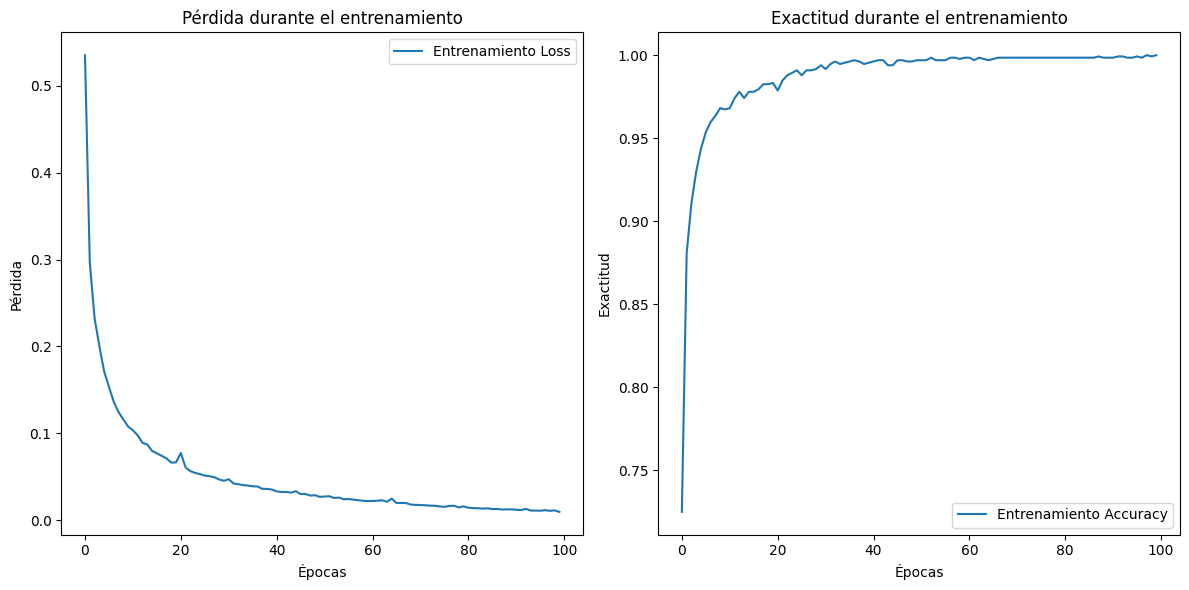

In [102]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento Loss')
#plt.plot(history.history['val_loss'], label='Validación Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validación Accuracy')
plt.title('Exactitud durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()

plt.tight_layout()
plt.show()


Test Loss: 0.4671
Test Accuracy: 0.8223
9/9 [==============================] - 0s 751us/step

Matriz de confusión (General):


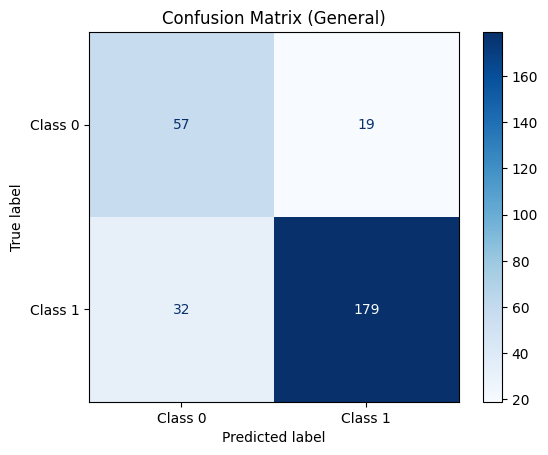


Reporte de clasificación (General):
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        76
           1       0.90      0.85      0.88       211

    accuracy                           0.82       287
   macro avg       0.77      0.80      0.78       287
weighted avg       0.83      0.82      0.83       287


Matriz de confusión (Por usuario):


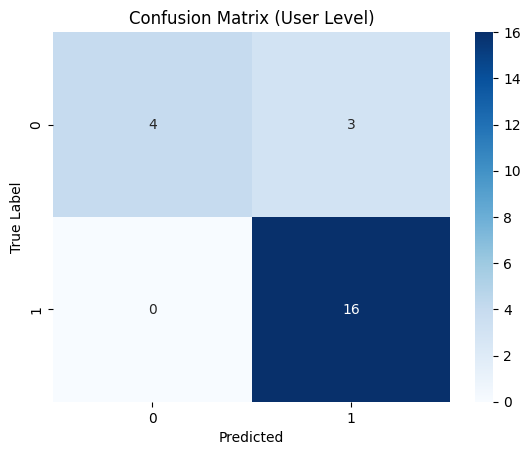


Accuracy por usuario: 0.87

Reporte de clasificación (Por usuario):
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.84      1.00      0.91        16

    accuracy                           0.87        23
   macro avg       0.92      0.79      0.82        23
weighted avg       0.89      0.87      0.86        23



In [103]:
# Evaluación en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predicciones en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Matriz de confusión normal
print("\nMatriz de confusión (General):")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (General)")
plt.show()

# Reporte de clasificación
print("\nReporte de clasificación (General):")
print(classification_report(y_test, y_pred))

# Evaluación por individuo
users_test_label_D = []
users_y_pred_D = []

for _, indices in dict_users_D.items():
    # Calcular promedio de etiquetas reales y predicciones por usuario
    users_test_label_D.append(np.mean([y_test[i] for i in indices]))
    users_y_pred_D.append(np.mean([y_pred[i] for i in indices]))

# Discretizar valores continuos
users_test_label_D_discrete = [1 if label >= 0.5 else 0 for label in users_test_label_D]
users_y_pred_D_discrete = [1 if pred >= 0.5 else 0 for pred in users_y_pred_D]

# Verificar tamaños consistentes
assert len(users_test_label_D_discrete) == len(users_y_pred_D_discrete), "Error: Los tamaños no coinciden."

# Matriz de confusión por individuo
print("\nMatriz de confusión (Por usuario):")
cm_users = confusion_matrix(users_test_label_D_discrete, users_y_pred_D_discrete)
sns.heatmap(cm_users, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix (User Level)')
plt.show()

# Métricas a nivel de usuario
accuracy_users = accuracy_score(users_test_label_D_discrete, users_y_pred_D_discrete)
print(f"\nAccuracy por usuario: {accuracy_users:.2f}")
print("\nReporte de clasificación (Por usuario):")
print(classification_report(users_test_label_D_discrete, users_y_pred_D_discrete))

Fitting 5 folds for each of 45 candidates, totalling 225 fits

Mejores parámetros encontrados:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Accuracy del mejor modelo: 0.91

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        76
           1       0.94      0.93      0.94       211

    accuracy                           0.91       287
   macro avg       0.88      0.89      0.88       287
weighted avg       0.91      0.91      0.91       287



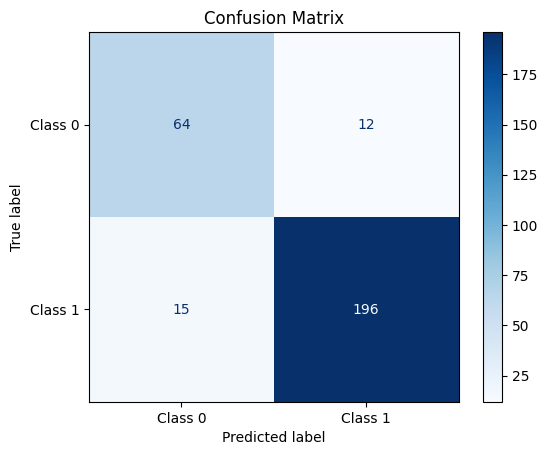

23
23


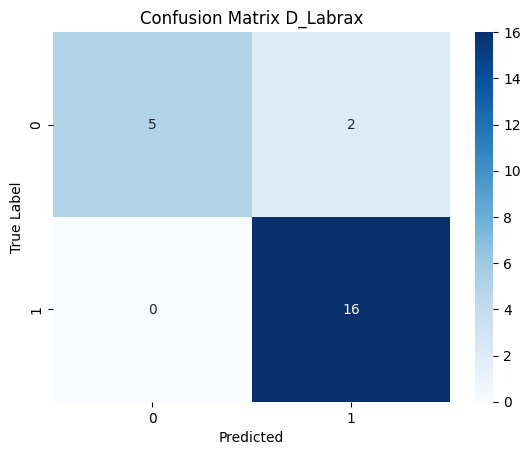

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(XTRAIN)
X_test_scaled = scaler.transform(XTEST)
y_train = np.array(yTRAIN)
y_test = 1 - np.array(yTEST)

# Configuración del GridSearchCV para SVC
param_grid = {
    'C': [0.1, 1, 10],  # Valores del parámetro de penalización
    'gamma': [0.01, 0.1, 1, 'scale', 'auto'],  # Valores del coeficiente del kernel
    'kernel': ['linear', 'rbf', 'poly']  # Tipos de kernel
}

grid_search = GridSearchCV(
    estimator=SVC(),  # Modelo SVC
    param_grid=param_grid, 
    cv=5,  # Validación cruzada con 5 particiones
    verbose=1, 
    n_jobs=-1  # Paralelización
)

grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("\nMejores parámetros encontrados:")
print(best_params)

model_svc = grid_search.best_estimator_
y_pred = model_svc.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy del mejor modelo: {accuracy:.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

users_test_label_D=[]
users_y_pred_D=[]

for _, indices in dict_users_D.items():
  users_test_label_D.append(sum([y_test[i] for i in indices])/len(indices))
  users_y_pred_D.append(sum([y_pred_knn[i] for i in indices])/len(indices))

# Discretizar los valores continuos
users_test_label_D_discrete = [1 if label >= 0.5 else 0 for label in users_test_label_D]
users_y_pred_D_discrete = [1 if pred >= 0.5 else 0 for pred in users_y_pred_D]

print(len(users_test_label_D_discrete))
print(len(users_y_pred_D_discrete))

# Calcular la matriz de confusión
cm = confusion_matrix(users_test_label_D_discrete, users_y_pred_D_discrete)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix D_Labrax')
plt.show()

In [105]:
XEscap_D_scaled = scaler.transform(XEscap_D)
y_escapD = model.predict(XEscap_D_scaled)
y_escapD = (y_escapD > 0.5).astype(int).flatten()
count_0, count_1 = np.bincount(y_escapD)

print("Cautivos: "+str(count_0))
print("salvajes: "+str(count_1))

28/28 [==============================] - 0s 1ms/step
Cautivos: 396
salvajes: 470


Usuarios cautivos: 33
Usuarios salvajes: 89


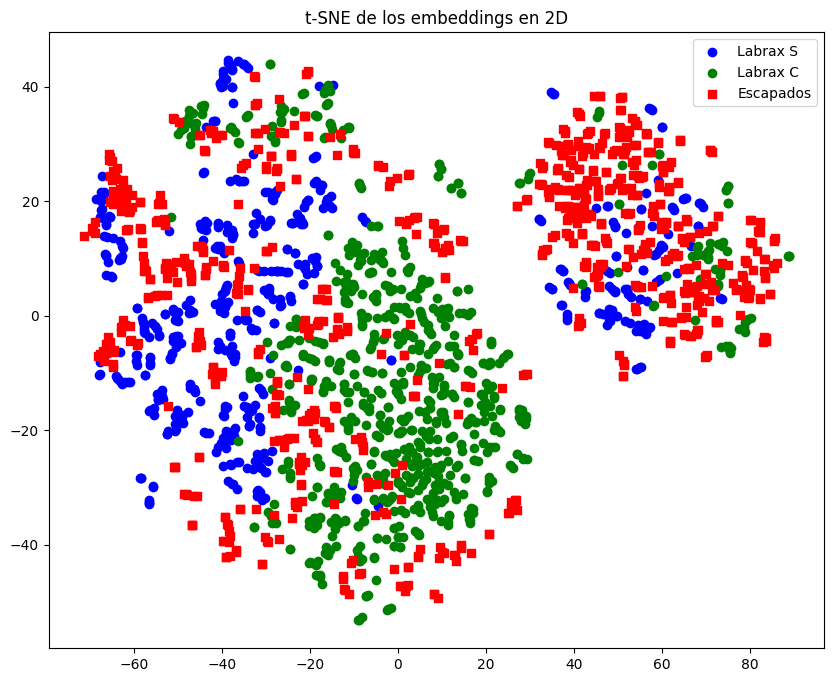

In [106]:
users_y_pred_ES_D = []

for _ , indices in dict_users_ES_D.items():
    users_y_pred_ES_D.append(np.mean([y_escapD[i] for i in indices]))

users_y_pred_ES_D_discrete = [1 if pred >= 0.5 else 0 for pred in users_y_pred_ES_D]
count_0, count_1 = np.bincount(users_y_pred_ES_D_discrete)

print("Usuarios cautivos: "+str(count_0))
print("Usuarios salvajes: "+str(count_1))

ALL_embeddings_D = np.concatenate((XTRAIN, XEscap_D), axis=0)

labels_ES_Slabels_D = np.concatenate((np.zeros(len(image_features_DS)),  # Aurata S (imágenes)
                         np.ones(len(image_features_DC)),   # Aurata C (imágenes)
                         np.ones(len(XEscap_D))*2))  # Embeddings de texto: "Aurata S" y "Aurata C"


tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_D_tsne = tsne.fit_transform(ALL_embeddings_D)

plt.figure(figsize=(10, 8))


plt.scatter(embeddings_D_tsne[(labels_ES_Slabels_D == 0), 0], embeddings_D_tsne[(labels_ES_Slabels_D == 0), 1],
            c='blue', marker='o', label='Labrax S')


plt.scatter(embeddings_D_tsne[(labels_ES_Slabels_D == 1), 0], embeddings_D_tsne[(labels_ES_Slabels_D == 1), 1],
            c='green', marker='o', label='Labrax C')


plt.scatter(embeddings_D_tsne[(labels_ES_Slabels_D == 2), 0], embeddings_D_tsne[(labels_ES_Slabels_D == 2), 1],
            c='red', marker='s', label='Escapados')


plt.title("t-SNE de los embeddings en 2D")
plt.legend()
plt.show()